In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(1, 16, 16)

In [4]:
t = np.linspace(0.1, 1.6, 16)

$y = 0.1x$,
$y = 0.2x$,
...,
$y = 1.6x$

In [5]:
sensors = np.zeros((16, 16))
for i in range(0, len(t)):
    for j in range(0, len(x)):
        sensors[i, j] = t[i] * x[j]

In [6]:
sensors = sensors.reshape(16, 16, 1)

In [7]:
sensors

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6]],

       [[ 0.2],
        [ 0.4],
        [ 0.6],
        [ 0.8],
        [ 1. ],
        [ 1.2],
        [ 1.4],
        [ 1.6],
        [ 1.8],
        [ 2. ],
        [ 2.2],
        [ 2.4],
        [ 2.6],
        [ 2.8],
        [ 3. ],
        [ 3.2]],

       [[ 0.3],
        [ 0.6],
        [ 0.9],
        [ 1.2],
        [ 1.5],
        [ 1.8],
        [ 2.1],
        [ 2.4],
        [ 2.7],
        [ 3. ],
        [ 3.3],
        [ 3.6],
        [ 3.9],
        [ 4.2],
        [ 4.5],
        [ 4.8]],

       [[ 0.4],
        [ 0.8],
        [ 1.2],
        [ 1.6],
        [ 2. ],
        [ 2.4],
        [ 2.8],
        [ 3.2],
        [ 3.6],
        [ 4. ],
        [ 4.4],
        [ 4.8],
        [ 5.2],
        [ 5.6],
  

In [8]:
sensors.shape

(16, 16, 1)

In [9]:
t = t.reshape((16, 1))

In [10]:
t_train, t_test, x_train, x_test = train_test_split(t, sensors, test_size=0.1, random_state=1)

In [11]:
t_test

array([[0.4],
       [1.4]])

In [12]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [13]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [14]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train, epochs=20000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/20000
1/1 [==============================] - 1s 1s/step - loss: 85.4078 - rmse: 9.2410
Epoch 2/20000
1/1 [==============================] - 0s 8ms/step - loss: 85.3986 - rmse: 9.2405
Epoch 3/20000
1/1 [==============================] - 0s 8ms/step - loss: 85.3897 - rmse: 9.2400
Epoch 4/20000
1/1 [==============================] - 0s 8ms/step - loss: 85.3810 - rmse: 9.2396
Epoch 5/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.3725 - rmse: 9.2391
Epoch 6/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.3641 - rmse: 9.2387
Epoch 7/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.3558 - rmse: 9.2382
Epoch 8/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.3475 - rmse: 9.2378
Epoch 9/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.3393 - rmse: 9.2373
Epoch 10/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.3311 - rmse: 9.2369
Epoch 11/20000
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 84.8819 - rmse: 9.2125
Epoch 86/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8764 - rmse: 9.2122
Epoch 87/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8709 - rmse: 9.2119
Epoch 88/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8654 - rmse: 9.2116
Epoch 89/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8599 - rmse: 9.2113
Epoch 90/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8544 - rmse: 9.2110
Epoch 91/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8489 - rmse: 9.2107
Epoch 92/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8434 - rmse: 9.2104
Epoch 93/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8379 - rmse: 9.2101
Epoch 94/20000
1/1 [==============================] - 0s 6ms/step - loss: 84.8324 - rmse: 9.2098
Epoch 95/20000
1/1 [=========================

1/1 [==============================] - 0s 8ms/step - loss: 84.4150 - rmse: 9.1872
Epoch 169/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.4094 - rmse: 9.1868
Epoch 170/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.4038 - rmse: 9.1865
Epoch 171/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.3982 - rmse: 9.1862
Epoch 172/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.3926 - rmse: 9.1859
Epoch 173/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.3870 - rmse: 9.1856
Epoch 174/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.3814 - rmse: 9.1853
Epoch 175/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.3758 - rmse: 9.1850
Epoch 176/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.3702 - rmse: 9.1847
Epoch 177/20000
1/1 [==============================] - 0s 6ms/step - loss: 84.3646 - rmse: 9.1844
Epoch 178/20000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 83.9514 - rmse: 9.1619
Epoch 252/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9458 - rmse: 9.1616
Epoch 253/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9402 - rmse: 9.1613
Epoch 254/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9347 - rmse: 9.1610
Epoch 255/20000
1/1 [==============================] - 0s 6ms/step - loss: 83.9291 - rmse: 9.1607
Epoch 256/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9235 - rmse: 9.1604
Epoch 257/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9179 - rmse: 9.1601
Epoch 258/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9123 - rmse: 9.1598
Epoch 259/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9068 - rmse: 9.1595
Epoch 260/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.9012 - rmse: 9.1592
Epoch 261/20000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 83.4852 - rmse: 9.1364
Epoch 335/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4795 - rmse: 9.1361
Epoch 336/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4738 - rmse: 9.1358
Epoch 337/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4682 - rmse: 9.1355
Epoch 338/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4624 - rmse: 9.1352
Epoch 339/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4567 - rmse: 9.1349
Epoch 340/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4511 - rmse: 9.1345
Epoch 341/20000
1/1 [==============================] - 0s 6ms/step - loss: 83.4454 - rmse: 9.1342
Epoch 342/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4396 - rmse: 9.1339
Epoch 343/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.4339 - rmse: 9.1336
Epoch 344/20000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 83.0058 - rmse: 9.1101
Epoch 418/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.0000 - rmse: 9.1098
Epoch 419/20000
1/1 [==============================] - 0s 6ms/step - loss: 82.9942 - rmse: 9.1095
Epoch 420/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.9885 - rmse: 9.1092
Epoch 421/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.9827 - rmse: 9.1089
Epoch 422/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.9769 - rmse: 9.1086
Epoch 423/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.9711 - rmse: 9.1082
Epoch 424/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.9653 - rmse: 9.1079
Epoch 425/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.9595 - rmse: 9.1076
Epoch 426/20000
1/1 [==============================] - 0s 6ms/step - loss: 82.9537 - rmse: 9.1073
Epoch 427/20000
1/1 [===============

1/1 [==============================] - 0s 10ms/step - loss: 82.5212 - rmse: 9.0835
Epoch 501/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.5153 - rmse: 9.0832
Epoch 502/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.5094 - rmse: 9.0829
Epoch 503/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.5035 - rmse: 9.0825
Epoch 504/20000
1/1 [==============================] - 0s 9ms/step - loss: 82.4976 - rmse: 9.0822
Epoch 505/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.4917 - rmse: 9.0819
Epoch 506/20000
1/1 [==============================] - 0s 11ms/step - loss: 82.4857 - rmse: 9.0816
Epoch 507/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.4798 - rmse: 9.0812
Epoch 508/20000
1/1 [==============================] - 0s 11ms/step - loss: 82.4739 - rmse: 9.0809
Epoch 509/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.4680 - rmse: 9.0806
Epoch 510/20000
1/1 [======

Epoch 583/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.0238 - rmse: 9.0561
Epoch 584/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.0178 - rmse: 9.0558
Epoch 585/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.0117 - rmse: 9.0554
Epoch 586/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.0056 - rmse: 9.0551
Epoch 587/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.9995 - rmse: 9.0548
Epoch 588/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.9934 - rmse: 9.0544
Epoch 589/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.9873 - rmse: 9.0541
Epoch 590/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.9812 - rmse: 9.0537
Epoch 591/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.9751 - rmse: 9.0534
Epoch 592/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.9690 - rmse: 9.0531
Epoch 593/

1/1 [==============================] - 0s 9ms/step - loss: 81.5134 - rmse: 9.0279
Epoch 666/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.5070 - rmse: 9.0275
Epoch 667/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.5006 - rmse: 9.0272
Epoch 668/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4941 - rmse: 9.0268
Epoch 669/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4877 - rmse: 9.0265
Epoch 670/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4813 - rmse: 9.0261
Epoch 671/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4749 - rmse: 9.0257
Epoch 672/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4684 - rmse: 9.0254
Epoch 673/20000
1/1 [==============================] - 0s 11ms/step - loss: 81.4620 - rmse: 9.0250
Epoch 674/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4555 - rmse: 9.0247
Epoch 675/20000
1/1 [======

Epoch 748/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.9714 - rmse: 8.9978
Epoch 749/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9648 - rmse: 8.9975
Epoch 750/20000
1/1 [==============================] - 0s 11ms/step - loss: 80.9581 - rmse: 8.9971
Epoch 751/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9515 - rmse: 8.9967
Epoch 752/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9448 - rmse: 8.9963
Epoch 753/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9382 - rmse: 8.9960
Epoch 754/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9315 - rmse: 8.9956
Epoch 755/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9249 - rmse: 8.9952
Epoch 756/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9182 - rmse: 8.9949
Epoch 757/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.9115 - rmse: 8.9945
Epoch 758/2

1/1 [==============================] - 0s 10ms/step - loss: 80.4016 - rmse: 8.9661
Epoch 831/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3935 - rmse: 8.9657
Epoch 832/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3854 - rmse: 8.9652
Epoch 833/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3772 - rmse: 8.9647
Epoch 834/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3690 - rmse: 8.9643
Epoch 835/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3608 - rmse: 8.9638
Epoch 836/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3527 - rmse: 8.9634
Epoch 837/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3446 - rmse: 8.9629
Epoch 838/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3364 - rmse: 8.9625
Epoch 839/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.3284 - rmse: 8.9620
Epoch 840/20000
1/1 [=====

Epoch 913/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6813 - rmse: 8.9259
Epoch 914/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6736 - rmse: 8.9254
Epoch 915/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6658 - rmse: 8.9250
Epoch 916/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6581 - rmse: 8.9245
Epoch 917/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6503 - rmse: 8.9241
Epoch 918/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6425 - rmse: 8.9237
Epoch 919/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6348 - rmse: 8.9232
Epoch 920/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6271 - rmse: 8.9228
Epoch 921/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6193 - rmse: 8.9224
Epoch 922/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6116 - rmse: 8.9219
Epoch 923/

1/1 [==============================] - 0s 9ms/step - loss: 79.0474 - rmse: 8.8903
Epoch 996/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.0396 - rmse: 8.8898
Epoch 997/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.0319 - rmse: 8.8894
Epoch 998/20000
1/1 [==============================] - 0s 11ms/step - loss: 79.0241 - rmse: 8.8890
Epoch 999/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.0163 - rmse: 8.8885
Epoch 1000/20000
1/1 [==============================] - 0s 11ms/step - loss: 79.0086 - rmse: 8.8881
Epoch 1001/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.0008 - rmse: 8.8876
Epoch 1002/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.9930 - rmse: 8.8872
Epoch 1003/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.9852 - rmse: 8.8868
Epoch 1004/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.9774 - rmse: 8.8863
Epoch 1005/20000
1/1 [

1/1 [==============================] - 0s 10ms/step - loss: 78.4039 - rmse: 8.8540
Epoch 1078/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3959 - rmse: 8.8536
Epoch 1079/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3880 - rmse: 8.8531
Epoch 1080/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3801 - rmse: 8.8527
Epoch 1081/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.3721 - rmse: 8.8522
Epoch 1082/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3642 - rmse: 8.8518
Epoch 1083/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3562 - rmse: 8.8513
Epoch 1084/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3483 - rmse: 8.8509
Epoch 1085/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3403 - rmse: 8.8504
Epoch 1086/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.3324 - rmse: 8.8500
Epoch 1087/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 77.7360 - rmse: 8.8162
Epoch 1160/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.7277 - rmse: 8.8157
Epoch 1161/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.7195 - rmse: 8.8153
Epoch 1162/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.7113 - rmse: 8.8148
Epoch 1163/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.7031 - rmse: 8.8143
Epoch 1164/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.6948 - rmse: 8.8139
Epoch 1165/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.6866 - rmse: 8.8134
Epoch 1166/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.6783 - rmse: 8.8129
Epoch 1167/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.6701 - rmse: 8.8125
Epoch 1168/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.6619 - rmse: 8.8120
Epoch 1169/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 77.0539 - rmse: 8.7774
Epoch 1242/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.0455 - rmse: 8.7770
Epoch 1243/20000
1/1 [==============================] - 0s 11ms/step - loss: 77.0371 - rmse: 8.7765
Epoch 1244/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.0286 - rmse: 8.7760
Epoch 1245/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.0202 - rmse: 8.7755
Epoch 1246/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.0118 - rmse: 8.7751
Epoch 1247/20000
1/1 [==============================] - 0s 10ms/step - loss: 77.0034 - rmse: 8.7746
Epoch 1248/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.9950 - rmse: 8.7741
Epoch 1249/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.9865 - rmse: 8.7736
Epoch 1250/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.9781 - rmse: 8.7731
Epoch 1251/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 76.3568 - rmse: 8.7377
Epoch 1324/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.3482 - rmse: 8.7372
Epoch 1325/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.3396 - rmse: 8.7367
Epoch 1326/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.3310 - rmse: 8.7362
Epoch 1327/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.3215 - rmse: 8.7356
Epoch 1328/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.3117 - rmse: 8.7351
Epoch 1329/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.3021 - rmse: 8.7345
Epoch 1330/20000
1/1 [==============================] - 0s 11ms/step - loss: 76.2930 - rmse: 8.7340
Epoch 1331/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.2840 - rmse: 8.7335
Epoch 1332/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.2758 - rmse: 8.7330
Epoch 1333/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 75.6376 - rmse: 8.6964
Epoch 1406/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.6288 - rmse: 8.6959
Epoch 1407/20000
1/1 [==============================] - 0s 11ms/step - loss: 75.6201 - rmse: 8.6954
Epoch 1408/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.6113 - rmse: 8.6949
Epoch 1409/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.6025 - rmse: 8.6944
Epoch 1410/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.5937 - rmse: 8.6939
Epoch 1411/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.5849 - rmse: 8.6934
Epoch 1412/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.5761 - rmse: 8.6929
Epoch 1413/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.5673 - rmse: 8.6924
Epoch 1414/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.5585 - rmse: 8.6919
Epoch 1415/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 74.9090 - rmse: 8.6544
Epoch 1488/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.9000 - rmse: 8.6539
Epoch 1489/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8910 - rmse: 8.6534
Epoch 1490/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8820 - rmse: 8.6529
Epoch 1491/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8730 - rmse: 8.6523
Epoch 1492/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8640 - rmse: 8.6518
Epoch 1493/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8550 - rmse: 8.6513
Epoch 1494/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8460 - rmse: 8.6508
Epoch 1495/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8370 - rmse: 8.6503
Epoch 1496/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.8280 - rmse: 8.6497
Epoch 1497/20000


1/1 [==============================] - 0s 10ms/step - loss: 74.0843 - rmse: 8.6066
Epoch 1570/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0742 - rmse: 8.6061
Epoch 1571/20000
1/1 [==============================] - 0s 11ms/step - loss: 74.0646 - rmse: 8.6055
Epoch 1572/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0550 - rmse: 8.6049
Epoch 1573/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0451 - rmse: 8.6044
Epoch 1574/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0347 - rmse: 8.6038
Epoch 1575/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0240 - rmse: 8.6031
Epoch 1576/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0133 - rmse: 8.6025
Epoch 1577/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0026 - rmse: 8.6019
Epoch 1578/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.9922 - rmse: 8.6013
Epoch 1579/20000


1/1 [==============================] - 0s 10ms/step - loss: 73.2712 - rmse: 8.5593
Epoch 1652/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2614 - rmse: 8.5587
Epoch 1653/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2516 - rmse: 8.5581
Epoch 1654/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2419 - rmse: 8.5576
Epoch 1655/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2322 - rmse: 8.5570
Epoch 1656/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2224 - rmse: 8.5564
Epoch 1657/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2128 - rmse: 8.5559
Epoch 1658/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.2030 - rmse: 8.5553
Epoch 1659/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.1933 - rmse: 8.5547
Epoch 1660/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.1836 - rmse: 8.5542
Epoch 1661/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 72.4798 - rmse: 8.5129
Epoch 1734/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4702 - rmse: 8.5124
Epoch 1735/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4606 - rmse: 8.5118
Epoch 1736/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4510 - rmse: 8.5112
Epoch 1737/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4415 - rmse: 8.5107
Epoch 1738/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4319 - rmse: 8.5101
Epoch 1739/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4223 - rmse: 8.5095
Epoch 1740/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4128 - rmse: 8.5090
Epoch 1741/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.4032 - rmse: 8.5084
Epoch 1742/20000
1/1 [==============================] - 0s 10ms/step - loss: 72.3937 - rmse: 8.5079
Epoch 1743/20000


1/1 [==============================] - 0s 10ms/step - loss: 71.7033 - rmse: 8.4672
Epoch 1816/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.6938 - rmse: 8.4666
Epoch 1817/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.6844 - rmse: 8.4661
Epoch 1818/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.6750 - rmse: 8.4655
Epoch 1819/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.6655 - rmse: 8.4650
Epoch 1820/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.6561 - rmse: 8.4644
Epoch 1821/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.6467 - rmse: 8.4638
Epoch 1822/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.6372 - rmse: 8.4633
Epoch 1823/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.6278 - rmse: 8.4627
Epoch 1824/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.6184 - rmse: 8.4622
Epoch 1825/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 70.9288 - rmse: 8.4213
Epoch 1898/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.9193 - rmse: 8.4208
Epoch 1899/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.9099 - rmse: 8.4202
Epoch 1900/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.9004 - rmse: 8.4196
Epoch 1901/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.8910 - rmse: 8.4191
Epoch 1902/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.8815 - rmse: 8.4185
Epoch 1903/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.8720 - rmse: 8.4180
Epoch 1904/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.8626 - rmse: 8.4174
Epoch 1905/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.8531 - rmse: 8.4168
Epoch 1906/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.8437 - rmse: 8.4163
Epoch 1907/20000


1/1 [==============================] - 0s 10ms/step - loss: 70.1518 - rmse: 8.3751
Epoch 1980/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.1423 - rmse: 8.3745
Epoch 1981/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.1328 - rmse: 8.3739
Epoch 1982/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.1233 - rmse: 8.3734
Epoch 1983/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.1138 - rmse: 8.3728
Epoch 1984/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.1043 - rmse: 8.3722
Epoch 1985/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.0948 - rmse: 8.3717
Epoch 1986/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.0853 - rmse: 8.3711
Epoch 1987/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.0758 - rmse: 8.3705
Epoch 1988/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.0663 - rmse: 8.3700
Epoch 1989/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 69.3654 - rmse: 8.3280
Epoch 2062/20000
1/1 [==============================] - 0s 11ms/step - loss: 69.3559 - rmse: 8.3274
Epoch 2063/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.3463 - rmse: 8.3268
Epoch 2064/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.3367 - rmse: 8.3263
Epoch 2065/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.3271 - rmse: 8.3257
Epoch 2066/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.3175 - rmse: 8.3251
Epoch 2067/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.3079 - rmse: 8.3245
Epoch 2068/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.2983 - rmse: 8.3240
Epoch 2069/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.2887 - rmse: 8.3234
Epoch 2070/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.2791 - rmse: 8.3228
Epoch 2071/20000


1/1 [==============================] - 0s 10ms/step - loss: 68.5791 - rmse: 8.2807
Epoch 2144/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5695 - rmse: 8.2801
Epoch 2145/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5599 - rmse: 8.2795
Epoch 2146/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5503 - rmse: 8.2789
Epoch 2147/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5407 - rmse: 8.2783
Epoch 2148/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5312 - rmse: 8.2778
Epoch 2149/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5216 - rmse: 8.2772
Epoch 2150/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5120 - rmse: 8.2766
Epoch 2151/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5024 - rmse: 8.2760
Epoch 2152/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.4928 - rmse: 8.2754
Epoch 2153/20000


1/1 [==============================] - 0s 10ms/step - loss: 67.7891 - rmse: 8.2328
Epoch 2226/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7792 - rmse: 8.2322
Epoch 2227/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7693 - rmse: 8.2316
Epoch 2228/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7596 - rmse: 8.2310
Epoch 2229/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7500 - rmse: 8.2304
Epoch 2230/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7403 - rmse: 8.2298
Epoch 2231/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7305 - rmse: 8.2293
Epoch 2232/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7207 - rmse: 8.2287
Epoch 2233/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7110 - rmse: 8.2281
Epoch 2234/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.7013 - rmse: 8.2275
Epoch 2235/20000


1/1 [==============================] - 0s 10ms/step - loss: 66.9958 - rmse: 8.1845
Epoch 2308/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9861 - rmse: 8.1839
Epoch 2309/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9765 - rmse: 8.1833
Epoch 2310/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9668 - rmse: 8.1827
Epoch 2311/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.9572 - rmse: 8.1821
Epoch 2312/20000
1/1 [==============================] - 0s 19ms/step - loss: 66.9475 - rmse: 8.1815
Epoch 2313/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9379 - rmse: 8.1810
Epoch 2314/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9282 - rmse: 8.1804
Epoch 2315/20000
1/1 [==============================] - 0s 11ms/step - loss: 66.9186 - rmse: 8.1798
Epoch 2316/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9090 - rmse: 8.1792
Epoch 2317/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 66.2048 - rmse: 8.1360
Epoch 2390/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1952 - rmse: 8.1354
Epoch 2391/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1855 - rmse: 8.1348
Epoch 2392/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1759 - rmse: 8.1343
Epoch 2393/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1662 - rmse: 8.1337
Epoch 2394/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1566 - rmse: 8.1331
Epoch 2395/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1469 - rmse: 8.1325
Epoch 2396/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1373 - rmse: 8.1319
Epoch 2397/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1276 - rmse: 8.1313
Epoch 2398/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1180 - rmse: 8.1307
Epoch 2399/20000


1/1 [==============================] - 0s 10ms/step - loss: 65.4139 - rmse: 8.0873
Epoch 2472/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.4043 - rmse: 8.0867
Epoch 2473/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.3946 - rmse: 8.0861
Epoch 2474/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3849 - rmse: 8.0855
Epoch 2475/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3753 - rmse: 8.0849
Epoch 2476/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3657 - rmse: 8.0843
Epoch 2477/20000
1/1 [==============================] - 0s 11ms/step - loss: 65.3560 - rmse: 8.0837
Epoch 2478/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3463 - rmse: 8.0831
Epoch 2479/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3367 - rmse: 8.0825
Epoch 2480/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3271 - rmse: 8.0819
Epoch 2481/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 64.6218 - rmse: 8.0382
Epoch 2554/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.6113 - rmse: 8.0375
Epoch 2555/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.6018 - rmse: 8.0369
Epoch 2556/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.5925 - rmse: 8.0363
Epoch 2557/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.5825 - rmse: 8.0357
Epoch 2558/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.5721 - rmse: 8.0351
Epoch 2559/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5623 - rmse: 8.0345
Epoch 2560/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.5529 - rmse: 8.0339
Epoch 2561/20000
1/1 [==============================] - 0s 11ms/step - loss: 64.5434 - rmse: 8.0333
Epoch 2562/20000
1/1 [==============================] - 0s 10ms/step - loss: 64.5334 - rmse: 8.0327
Epoch 2563/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 63.8226 - rmse: 7.9883
Epoch 2636/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.8128 - rmse: 7.9877
Epoch 2637/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.8030 - rmse: 7.9871
Epoch 2638/20000
1/1 [==============================] - 0s 11ms/step - loss: 63.7932 - rmse: 7.9865
Epoch 2639/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7836 - rmse: 7.9859
Epoch 2640/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7738 - rmse: 7.9852
Epoch 2641/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7642 - rmse: 7.9846
Epoch 2642/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7545 - rmse: 7.9840
Epoch 2643/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7448 - rmse: 7.9834
Epoch 2644/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7351 - rmse: 7.9828
Epoch 2645/20000


1/1 [==============================] - 0s 10ms/step - loss: 63.0288 - rmse: 7.9385
Epoch 2718/20000
1/1 [==============================] - 0s 11ms/step - loss: 63.0192 - rmse: 7.9379
Epoch 2719/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.0095 - rmse: 7.9372
Epoch 2720/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.9998 - rmse: 7.9366
Epoch 2721/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.9903 - rmse: 7.9360
Epoch 2722/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9807 - rmse: 7.9354
Epoch 2723/20000
1/1 [==============================] - 0s 11ms/step - loss: 62.9709 - rmse: 7.9348
Epoch 2724/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.9612 - rmse: 7.9342
Epoch 2725/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.9516 - rmse: 7.9336
Epoch 2726/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9419 - rmse: 7.9330
Epoch 2727/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 62.2371 - rmse: 7.8884
Epoch 2800/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.2275 - rmse: 7.8878
Epoch 2801/20000
1/1 [==============================] - 0s 11ms/step - loss: 62.2178 - rmse: 7.8872
Epoch 2802/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.2082 - rmse: 7.8866
Epoch 2803/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1986 - rmse: 7.8860
Epoch 2804/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1889 - rmse: 7.8854
Epoch 2805/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1793 - rmse: 7.8848
Epoch 2806/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.1697 - rmse: 7.8842
Epoch 2807/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1600 - rmse: 7.8835
Epoch 2808/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1504 - rmse: 7.8829
Epoch 2809/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 61.4479 - rmse: 7.8383
Epoch 2882/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.4383 - rmse: 7.8376
Epoch 2883/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.4287 - rmse: 7.8370
Epoch 2884/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.4191 - rmse: 7.8364
Epoch 2885/20000
1/1 [==============================] - 0s 11ms/step - loss: 61.4095 - rmse: 7.8358
Epoch 2886/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.3999 - rmse: 7.8352
Epoch 2887/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3903 - rmse: 7.8346
Epoch 2888/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.3807 - rmse: 7.8340
Epoch 2889/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.3711 - rmse: 7.8334
Epoch 2890/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.3614 - rmse: 7.8327
Epoch 2891/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 60.6608 - rmse: 7.7879
Epoch 2964/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.6511 - rmse: 7.7873
Epoch 2965/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.6416 - rmse: 7.7867
Epoch 2966/20000
1/1 [==============================] - 0s 11ms/step - loss: 60.6320 - rmse: 7.7860
Epoch 2967/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.6224 - rmse: 7.7854
Epoch 2968/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.6129 - rmse: 7.7848
Epoch 2969/20000
1/1 [==============================] - 0s 11ms/step - loss: 60.6034 - rmse: 7.7842
Epoch 2970/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.5937 - rmse: 7.7836
Epoch 2971/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.5841 - rmse: 7.7830
Epoch 2972/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.5745 - rmse: 7.7823
Epoch 2973/20000


1/1 [==============================] - 0s 10ms/step - loss: 59.8763 - rmse: 7.7374
Epoch 3046/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8667 - rmse: 7.7367
Epoch 3047/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8572 - rmse: 7.7361
Epoch 3048/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8476 - rmse: 7.7355
Epoch 3049/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8380 - rmse: 7.7349
Epoch 3050/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8285 - rmse: 7.7343
Epoch 3051/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8190 - rmse: 7.7337
Epoch 3052/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.8094 - rmse: 7.7330
Epoch 3053/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.7999 - rmse: 7.7324
Epoch 3054/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.7904 - rmse: 7.7318
Epoch 3055/20000


1/1 [==============================] - 0s 10ms/step - loss: 59.0944 - rmse: 7.6867
Epoch 3128/20000
1/1 [==============================] - 0s 11ms/step - loss: 59.0849 - rmse: 7.6860
Epoch 3129/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0753 - rmse: 7.6854
Epoch 3130/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0658 - rmse: 7.6848
Epoch 3131/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0563 - rmse: 7.6842
Epoch 3132/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0469 - rmse: 7.6836
Epoch 3133/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0372 - rmse: 7.6829
Epoch 3134/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0278 - rmse: 7.6823
Epoch 3135/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0183 - rmse: 7.6817
Epoch 3136/20000
1/1 [==============================] - 0s 10ms/step - loss: 59.0087 - rmse: 7.6811
Epoch 3137/20000


Epoch 3209/20000
1/1 [==============================] - 0s 10ms/step - loss: 58.3154 - rmse: 7.6358
Epoch 3210/20000
1/1 [==============================] - 0s 10ms/step - loss: 58.3059 - rmse: 7.6352
Epoch 3211/20000
1/1 [==============================] - 0s 10ms/step - loss: 58.2964 - rmse: 7.6346
Epoch 3212/20000
1/1 [==============================] - 0s 10ms/step - loss: 58.2869 - rmse: 7.6340
Epoch 3213/20000
1/1 [==============================] - 0s 11ms/step - loss: 58.2774 - rmse: 7.6333
Epoch 3214/20000
1/1 [==============================] - 0s 10ms/step - loss: 58.2680 - rmse: 7.6327
Epoch 3215/20000
1/1 [==============================] - 0s 10ms/step - loss: 58.2584 - rmse: 7.6321
Epoch 3216/20000
1/1 [==============================] - 0s 11ms/step - loss: 58.2490 - rmse: 7.6315
Epoch 3217/20000
1/1 [==============================] - 0s 11ms/step - loss: 58.2395 - rmse: 7.6309
Epoch 3218/20000
1/1 [==============================] - 0s 11ms/step - loss: 58.2300 - rmse: 7.6302


Epoch 3291/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.5395 - rmse: 7.5848
Epoch 3292/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.5300 - rmse: 7.5842
Epoch 3293/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.5206 - rmse: 7.5836
Epoch 3294/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.5112 - rmse: 7.5830
Epoch 3295/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.5017 - rmse: 7.5824
Epoch 3296/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.4923 - rmse: 7.5817
Epoch 3297/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.4829 - rmse: 7.5811
Epoch 3298/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.4734 - rmse: 7.5805
Epoch 3299/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.4640 - rmse: 7.5799
Epoch 3300/20000
1/1 [==============================] - 0s 10ms/step - loss: 57.4546 - rmse: 7.5792


Epoch 3373/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7665 - rmse: 7.5337
Epoch 3374/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7571 - rmse: 7.5331
Epoch 3375/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7477 - rmse: 7.5325
Epoch 3376/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7383 - rmse: 7.5318
Epoch 3377/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7289 - rmse: 7.5312
Epoch 3378/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7195 - rmse: 7.5306
Epoch 3379/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.7102 - rmse: 7.5300
Epoch 3380/20000
1/1 [==============================] - 0s 9ms/step - loss: 56.7008 - rmse: 7.5294
Epoch 3381/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.6913 - rmse: 7.5287
Epoch 3382/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.6820 - rmse: 7.5281
E

Epoch 3455/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9978 - rmse: 7.4825
Epoch 3456/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9885 - rmse: 7.4819
Epoch 3457/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9791 - rmse: 7.4813
Epoch 3458/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9698 - rmse: 7.4807
Epoch 3459/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9604 - rmse: 7.4800
Epoch 3460/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9511 - rmse: 7.4794
Epoch 3461/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9417 - rmse: 7.4788
Epoch 3462/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9324 - rmse: 7.4782
Epoch 3463/20000
1/1 [==============================] - 0s 11ms/step - loss: 55.9231 - rmse: 7.4775
Epoch 3464/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.9137 - rmse: 7.4769


1/1 [==============================] - 0s 9ms/step - loss: 55.2333 - rmse: 7.4313
Epoch 3538/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.2240 - rmse: 7.4306
Epoch 3539/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.2147 - rmse: 7.4300
Epoch 3540/20000
1/1 [==============================] - 0s 9ms/step - loss: 55.2054 - rmse: 7.4294
Epoch 3541/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.1961 - rmse: 7.4288
Epoch 3542/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.1868 - rmse: 7.4281
Epoch 3543/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.1775 - rmse: 7.4275
Epoch 3544/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.1682 - rmse: 7.4269
Epoch 3545/20000
1/1 [==============================] - 0s 9ms/step - loss: 55.1589 - rmse: 7.4263
Epoch 3546/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.1497 - rmse: 7.4256
Epoch 3547/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 54.4732 - rmse: 7.3799
Epoch 3620/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.4639 - rmse: 7.3793
Epoch 3621/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.4547 - rmse: 7.3787
Epoch 3622/20000
1/1 [==============================] - 0s 11ms/step - loss: 54.4454 - rmse: 7.3781
Epoch 3623/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.4362 - rmse: 7.3774
Epoch 3624/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.4270 - rmse: 7.3768
Epoch 3625/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.4177 - rmse: 7.3762
Epoch 3626/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.4085 - rmse: 7.3756
Epoch 3627/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.3993 - rmse: 7.3749
Epoch 3628/20000
1/1 [==============================] - 0s 9ms/step - loss: 54.3900 - rmse: 7.3743
Epoch 3629/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 53.7177 - rmse: 7.3286
Epoch 3702/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.7085 - rmse: 7.3280
Epoch 3703/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6994 - rmse: 7.3273
Epoch 3704/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6902 - rmse: 7.3267
Epoch 3705/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6810 - rmse: 7.3261
Epoch 3706/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6718 - rmse: 7.3255
Epoch 3707/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6626 - rmse: 7.3248
Epoch 3708/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6535 - rmse: 7.3242
Epoch 3709/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6443 - rmse: 7.3236
Epoch 3710/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.6351 - rmse: 7.3229
Epoch 3711/20000


1/1 [==============================] - 0s 10ms/step - loss: 52.9672 - rmse: 7.2772
Epoch 3784/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9581 - rmse: 7.2766
Epoch 3785/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9490 - rmse: 7.2759
Epoch 3786/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9398 - rmse: 7.2753
Epoch 3787/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9307 - rmse: 7.2747
Epoch 3788/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9216 - rmse: 7.2741
Epoch 3789/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9125 - rmse: 7.2734
Epoch 3790/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.9034 - rmse: 7.2728
Epoch 3791/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.8943 - rmse: 7.2722
Epoch 3792/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.8852 - rmse: 7.2716
Epoch 3793/20000


1/1 [==============================] - 0s 10ms/step - loss: 52.2219 - rmse: 7.2258
Epoch 3866/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.2128 - rmse: 7.2252
Epoch 3867/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.2038 - rmse: 7.2246
Epoch 3868/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1947 - rmse: 7.2239
Epoch 3869/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1857 - rmse: 7.2233
Epoch 3870/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1766 - rmse: 7.2227
Epoch 3871/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1676 - rmse: 7.2221
Epoch 3872/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1585 - rmse: 7.2214
Epoch 3873/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1495 - rmse: 7.2208
Epoch 3874/20000
1/1 [==============================] - 0s 10ms/step - loss: 52.1404 - rmse: 7.2202
Epoch 3875/20000


1/1 [==============================] - 0s 10ms/step - loss: 51.4820 - rmse: 7.1744
Epoch 3948/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4730 - rmse: 7.1738
Epoch 3949/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4640 - rmse: 7.1732
Epoch 3950/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4550 - rmse: 7.1725
Epoch 3951/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4460 - rmse: 7.1719
Epoch 3952/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4370 - rmse: 7.1713
Epoch 3953/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4280 - rmse: 7.1707
Epoch 3954/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4190 - rmse: 7.1700
Epoch 3955/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4101 - rmse: 7.1694
Epoch 3956/20000
1/1 [==============================] - 0s 10ms/step - loss: 51.4011 - rmse: 7.1688
Epoch 3957/20000


1/1 [==============================] - 0s 10ms/step - loss: 50.7477 - rmse: 7.1231
Epoch 4030/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.7387 - rmse: 7.1224
Epoch 4031/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.7298 - rmse: 7.1218
Epoch 4032/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.7209 - rmse: 7.1212
Epoch 4033/20000
1/1 [==============================] - 0s 9ms/step - loss: 50.7120 - rmse: 7.1206
Epoch 4034/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.7031 - rmse: 7.1199
Epoch 4035/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.6942 - rmse: 7.1193
Epoch 4036/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.6852 - rmse: 7.1187
Epoch 4037/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.6763 - rmse: 7.1181
Epoch 4038/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.6674 - rmse: 7.1174
Epoch 4039/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 50.0192 - rmse: 7.0718
Epoch 4112/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.0103 - rmse: 7.0711
Epoch 4113/20000
1/1 [==============================] - 0s 10ms/step - loss: 50.0015 - rmse: 7.0705
Epoch 4114/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.9926 - rmse: 7.0699
Epoch 4115/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.9838 - rmse: 7.0692
Epoch 4116/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.9750 - rmse: 7.0686
Epoch 4117/20000
1/1 [==============================] - 0s 11ms/step - loss: 49.9661 - rmse: 7.0680
Epoch 4118/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.9573 - rmse: 7.0674
Epoch 4119/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.9484 - rmse: 7.0667
Epoch 4120/20000
1/1 [==============================] - 0s 9ms/step - loss: 49.9396 - rmse: 7.0661
Epoch 4121/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 49.2967 - rmse: 7.0205
Epoch 4194/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2879 - rmse: 7.0199
Epoch 4195/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2792 - rmse: 7.0192
Epoch 4196/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2704 - rmse: 7.0186
Epoch 4197/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2616 - rmse: 7.0180
Epoch 4198/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2528 - rmse: 7.0174
Epoch 4199/20000
1/1 [==============================] - 0s 9ms/step - loss: 49.2441 - rmse: 7.0167
Epoch 4200/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2353 - rmse: 7.0161
Epoch 4201/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2265 - rmse: 7.0155
Epoch 4202/20000
1/1 [==============================] - 0s 10ms/step - loss: 49.2178 - rmse: 7.0149
Epoch 4203/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 48.5804 - rmse: 6.9693
Epoch 4276/20000
1/1 [==============================] - 0s 10ms/step - loss: 48.5717 - rmse: 6.9687
Epoch 4277/20000
1/1 [==============================] - 0s 9ms/step - loss: 48.5630 - rmse: 6.9680
Epoch 4278/20000
1/1 [==============================] - 0s 10ms/step - loss: 48.5543 - rmse: 6.9674
Epoch 4279/20000
1/1 [==============================] - 0s 11ms/step - loss: 48.5456 - rmse: 6.9668
Epoch 4280/20000
1/1 [==============================] - 0s 10ms/step - loss: 48.5369 - rmse: 6.9662
Epoch 4281/20000
1/1 [==============================] - 0s 11ms/step - loss: 48.5283 - rmse: 6.9655
Epoch 4282/20000
1/1 [==============================] - 0s 11ms/step - loss: 48.5196 - rmse: 6.9649
Epoch 4283/20000
1/1 [==============================] - 0s 10ms/step - loss: 48.5109 - rmse: 6.9643
Epoch 4284/20000
1/1 [==============================] - 0s 10ms/step - loss: 48.5022 - rmse: 6.9637
Epoch 4285/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 47.8704 - rmse: 6.9182
Epoch 4358/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8618 - rmse: 6.9175
Epoch 4359/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8532 - rmse: 6.9169
Epoch 4360/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8446 - rmse: 6.9163
Epoch 4361/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8360 - rmse: 6.9157
Epoch 4362/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8274 - rmse: 6.9150
Epoch 4363/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8188 - rmse: 6.9144
Epoch 4364/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8101 - rmse: 6.9138
Epoch 4365/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.8015 - rmse: 6.9132
Epoch 4366/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.7929 - rmse: 6.9126
Epoch 4367/20000


1/1 [==============================] - 0s 10ms/step - loss: 47.1669 - rmse: 6.8671
Epoch 4440/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1584 - rmse: 6.8665
Epoch 4441/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1499 - rmse: 6.8659
Epoch 4442/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1413 - rmse: 6.8653
Epoch 4443/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1328 - rmse: 6.8646
Epoch 4444/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1243 - rmse: 6.8640
Epoch 4445/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1157 - rmse: 6.8634
Epoch 4446/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.1072 - rmse: 6.8628
Epoch 4447/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.0987 - rmse: 6.8622
Epoch 4448/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.0901 - rmse: 6.8615
Epoch 4449/20000


1/1 [==============================] - 0s 10ms/step - loss: 46.4700 - rmse: 6.8162
Epoch 4522/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4616 - rmse: 6.8156
Epoch 4523/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4531 - rmse: 6.8150
Epoch 4524/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4446 - rmse: 6.8143
Epoch 4525/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4362 - rmse: 6.8137
Epoch 4526/20000
1/1 [==============================] - 0s 11ms/step - loss: 46.4277 - rmse: 6.8131
Epoch 4527/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4193 - rmse: 6.8125
Epoch 4528/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4108 - rmse: 6.8119
Epoch 4529/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.4024 - rmse: 6.8112
Epoch 4530/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.3939 - rmse: 6.8106
Epoch 4531/20000


1/1 [==============================] - 0s 10ms/step - loss: 45.7798 - rmse: 6.7654
Epoch 4604/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7714 - rmse: 6.7648
Epoch 4605/20000
1/1 [==============================] - 0s 9ms/step - loss: 45.7630 - rmse: 6.7641
Epoch 4606/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7546 - rmse: 6.7635
Epoch 4607/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7463 - rmse: 6.7629
Epoch 4608/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7379 - rmse: 6.7623
Epoch 4609/20000
1/1 [==============================] - 0s 9ms/step - loss: 45.7295 - rmse: 6.7617
Epoch 4610/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7212 - rmse: 6.7610
Epoch 4611/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7128 - rmse: 6.7604
Epoch 4612/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.7044 - rmse: 6.7598
Epoch 4613/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 45.0963 - rmse: 6.7147
Epoch 4686/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0880 - rmse: 6.7141
Epoch 4687/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0797 - rmse: 6.7134
Epoch 4688/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0714 - rmse: 6.7128
Epoch 4689/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0631 - rmse: 6.7122
Epoch 4690/20000
1/1 [==============================] - 0s 11ms/step - loss: 45.0548 - rmse: 6.7116
Epoch 4691/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0465 - rmse: 6.7110
Epoch 4692/20000
1/1 [==============================] - 0s 11ms/step - loss: 45.0383 - rmse: 6.7104
Epoch 4693/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0300 - rmse: 6.7097
Epoch 4694/20000
1/1 [==============================] - 0s 10ms/step - loss: 45.0217 - rmse: 6.7091
Epoch 4695/20000


1/1 [==============================] - 0s 10ms/step - loss: 44.4196 - rmse: 6.6641
Epoch 4768/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.4114 - rmse: 6.6635
Epoch 4769/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.4032 - rmse: 6.6629
Epoch 4770/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3950 - rmse: 6.6623
Epoch 4771/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3868 - rmse: 6.6616
Epoch 4772/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3786 - rmse: 6.6610
Epoch 4773/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3704 - rmse: 6.6604
Epoch 4774/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3622 - rmse: 6.6598
Epoch 4775/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3540 - rmse: 6.6592
Epoch 4776/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.3458 - rmse: 6.6586
Epoch 4777/20000


1/1 [==============================] - 0s 10ms/step - loss: 43.7498 - rmse: 6.6137
Epoch 4850/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.7417 - rmse: 6.6130
Epoch 4851/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.7336 - rmse: 6.6124
Epoch 4852/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.7255 - rmse: 6.6118
Epoch 4853/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.7173 - rmse: 6.6112
Epoch 4854/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.7092 - rmse: 6.6106
Epoch 4855/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.7011 - rmse: 6.6100
Epoch 4856/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.6930 - rmse: 6.6094
Epoch 4857/20000
1/1 [==============================] - 0s 9ms/step - loss: 43.6849 - rmse: 6.6087
Epoch 4858/20000
1/1 [==============================] - 0s 9ms/step - loss: 43.6768 - rmse: 6.6081
Epoch 4859/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 43.0869 - rmse: 6.5634
Epoch 4932/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0789 - rmse: 6.5627
Epoch 4933/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0709 - rmse: 6.5621
Epoch 4934/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0628 - rmse: 6.5615
Epoch 4935/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0548 - rmse: 6.5609
Epoch 4936/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0468 - rmse: 6.5603
Epoch 4937/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0387 - rmse: 6.5597
Epoch 4938/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0307 - rmse: 6.5591
Epoch 4939/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0226 - rmse: 6.5585
Epoch 4940/20000
1/1 [==============================] - 0s 10ms/step - loss: 43.0146 - rmse: 6.5578
Epoch 4941/20000


1/1 [==============================] - 0s 10ms/step - loss: 42.4309 - rmse: 6.5132
Epoch 5014/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.4230 - rmse: 6.5126
Epoch 5015/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.4150 - rmse: 6.5120
Epoch 5016/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.4071 - rmse: 6.5114
Epoch 5017/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.3991 - rmse: 6.5107
Epoch 5018/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.3912 - rmse: 6.5101
Epoch 5019/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.3832 - rmse: 6.5095
Epoch 5020/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.3753 - rmse: 6.5089
Epoch 5021/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.3673 - rmse: 6.5083
Epoch 5022/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.3594 - rmse: 6.5077
Epoch 5023/20000


1/1 [==============================] - 0s 10ms/step - loss: 41.7818 - rmse: 6.4632
Epoch 5096/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7739 - rmse: 6.4626
Epoch 5097/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7661 - rmse: 6.4620
Epoch 5098/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7582 - rmse: 6.4613
Epoch 5099/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7503 - rmse: 6.4607
Epoch 5100/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7425 - rmse: 6.4601
Epoch 5101/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7346 - rmse: 6.4595
Epoch 5102/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7267 - rmse: 6.4589
Epoch 5103/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7189 - rmse: 6.4583
Epoch 5104/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.7110 - rmse: 6.4577
Epoch 5105/20000


1/1 [==============================] - 0s 9ms/step - loss: 41.1395 - rmse: 6.4133
Epoch 5178/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.1317 - rmse: 6.4127
Epoch 5179/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.1239 - rmse: 6.4121
Epoch 5180/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.1161 - rmse: 6.4115
Epoch 5181/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.1083 - rmse: 6.4109
Epoch 5182/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.1006 - rmse: 6.4103
Epoch 5183/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.0928 - rmse: 6.4096
Epoch 5184/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.0850 - rmse: 6.4090
Epoch 5185/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.0772 - rmse: 6.4084
Epoch 5186/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.0694 - rmse: 6.4078
Epoch 5187/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 40.5040 - rmse: 6.3636
Epoch 5260/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4963 - rmse: 6.3629
Epoch 5261/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4885 - rmse: 6.3623
Epoch 5262/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4808 - rmse: 6.3617
Epoch 5263/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4731 - rmse: 6.3611
Epoch 5264/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4654 - rmse: 6.3605
Epoch 5265/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4577 - rmse: 6.3599
Epoch 5266/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4500 - rmse: 6.3593
Epoch 5267/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4423 - rmse: 6.3587
Epoch 5268/20000
1/1 [==============================] - 0s 10ms/step - loss: 40.4346 - rmse: 6.3581
Epoch 5269/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 39.8751 - rmse: 6.3139
Epoch 5342/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8674 - rmse: 6.3133
Epoch 5343/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8598 - rmse: 6.3127
Epoch 5344/20000
1/1 [==============================] - 0s 11ms/step - loss: 39.8522 - rmse: 6.3121
Epoch 5345/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8445 - rmse: 6.3115
Epoch 5346/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8369 - rmse: 6.3109
Epoch 5347/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8293 - rmse: 6.3103
Epoch 5348/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8217 - rmse: 6.3097
Epoch 5349/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8141 - rmse: 6.3091
Epoch 5350/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.8064 - rmse: 6.3085
Epoch 5351/20000


1/1 [==============================] - 0s 10ms/step - loss: 39.2527 - rmse: 6.2645
Epoch 5424/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.2451 - rmse: 6.2639
Epoch 5425/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.2376 - rmse: 6.2633
Epoch 5426/20000
1/1 [==============================] - 0s 9ms/step - loss: 39.2300 - rmse: 6.2627
Epoch 5427/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.2225 - rmse: 6.2621
Epoch 5428/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.2149 - rmse: 6.2615
Epoch 5429/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.2074 - rmse: 6.2609
Epoch 5430/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.1998 - rmse: 6.2603
Epoch 5431/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.1923 - rmse: 6.2596
Epoch 5432/20000
1/1 [==============================] - 0s 9ms/step - loss: 39.1848 - rmse: 6.2590
Epoch 5433/20000
1/

1/1 [==============================] - 0s 11ms/step - loss: 38.6367 - rmse: 6.2151
Epoch 5506/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.6292 - rmse: 6.2145
Epoch 5507/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.6217 - rmse: 6.2139
Epoch 5508/20000
1/1 [==============================] - 0s 9ms/step - loss: 38.6143 - rmse: 6.2133
Epoch 5509/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.6068 - rmse: 6.2127
Epoch 5510/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.5993 - rmse: 6.2121
Epoch 5511/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.5919 - rmse: 6.2115
Epoch 5512/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.5844 - rmse: 6.2109
Epoch 5513/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.5769 - rmse: 6.2103
Epoch 5514/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.5695 - rmse: 6.2097
Epoch 5515/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 38.0269 - rmse: 6.1659
Epoch 5588/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.0195 - rmse: 6.1653
Epoch 5589/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.0121 - rmse: 6.1647
Epoch 5590/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.0047 - rmse: 6.1641
Epoch 5591/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.9973 - rmse: 6.1635
Epoch 5592/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.9899 - rmse: 6.1629
Epoch 5593/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.9825 - rmse: 6.1623
Epoch 5594/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.9751 - rmse: 6.1617
Epoch 5595/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.9677 - rmse: 6.1611
Epoch 5596/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.9603 - rmse: 6.1605
Epoch 5597/20000


1/1 [==============================] - 0s 11ms/step - loss: 37.4230 - rmse: 6.1167
Epoch 5670/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.4157 - rmse: 6.1161
Epoch 5671/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.4083 - rmse: 6.1155
Epoch 5672/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.4010 - rmse: 6.1149
Epoch 5673/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.3937 - rmse: 6.1143
Epoch 5674/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.3864 - rmse: 6.1137
Epoch 5675/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.3791 - rmse: 6.1131
Epoch 5676/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.3717 - rmse: 6.1125
Epoch 5677/20000
1/1 [==============================] - 0s 9ms/step - loss: 37.3644 - rmse: 6.1119
Epoch 5678/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.3571 - rmse: 6.1113
Epoch 5679/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 36.8249 - rmse: 6.0676
Epoch 5752/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.8176 - rmse: 6.0670
Epoch 5753/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.8104 - rmse: 6.0664
Epoch 5754/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.8031 - rmse: 6.0658
Epoch 5755/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.7959 - rmse: 6.0652
Epoch 5756/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.7886 - rmse: 6.0646
Epoch 5757/20000
1/1 [==============================] - 0s 11ms/step - loss: 36.7813 - rmse: 6.0640
Epoch 5758/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.7741 - rmse: 6.0634
Epoch 5759/20000
1/1 [==============================] - 0s 11ms/step - loss: 36.7668 - rmse: 6.0628
Epoch 5760/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.7596 - rmse: 6.0622
Epoch 5761/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 36.2322 - rmse: 6.0186
Epoch 5834/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.2250 - rmse: 6.0180
Epoch 5835/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.2178 - rmse: 6.0174
Epoch 5836/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.2106 - rmse: 6.0168
Epoch 5837/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.2034 - rmse: 6.0162
Epoch 5838/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.1962 - rmse: 6.0156
Epoch 5839/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.1890 - rmse: 6.0150
Epoch 5840/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.1818 - rmse: 6.0144
Epoch 5841/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.1747 - rmse: 6.0138
Epoch 5842/20000
1/1 [==============================] - 0s 10ms/step - loss: 36.1674 - rmse: 6.0132
Epoch 5843/20000


1/1 [==============================] - 0s 10ms/step - loss: 35.6445 - rmse: 5.9696
Epoch 5916/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.6374 - rmse: 5.9690
Epoch 5917/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.6303 - rmse: 5.9684
Epoch 5918/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.6231 - rmse: 5.9678
Epoch 5919/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.6160 - rmse: 5.9672
Epoch 5920/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.6089 - rmse: 5.9666
Epoch 5921/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.6017 - rmse: 5.9660
Epoch 5922/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.5946 - rmse: 5.9654
Epoch 5923/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.5875 - rmse: 5.9648
Epoch 5924/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.5803 - rmse: 5.9642
Epoch 5925/20000
1/1

1/1 [==============================] - 0s 11ms/step - loss: 35.0614 - rmse: 5.9205
Epoch 5998/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.0543 - rmse: 5.9199
Epoch 5999/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.0473 - rmse: 5.9193
Epoch 6000/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.0402 - rmse: 5.9187
Epoch 6001/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.0331 - rmse: 5.9181
Epoch 6002/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.0260 - rmse: 5.9175
Epoch 6003/20000
1/1 [==============================] - 0s 11ms/step - loss: 35.0189 - rmse: 5.9169
Epoch 6004/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.0118 - rmse: 5.9163
Epoch 6005/20000
1/1 [==============================] - 0s 10ms/step - loss: 35.0048 - rmse: 5.9157
Epoch 6006/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.9977 - rmse: 5.9151
Epoch 6007/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 34.4817 - rmse: 5.8714
Epoch 6080/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4747 - rmse: 5.8708
Epoch 6081/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4676 - rmse: 5.8702
Epoch 6082/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4606 - rmse: 5.8696
Epoch 6083/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4535 - rmse: 5.8690
Epoch 6084/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4464 - rmse: 5.8684
Epoch 6085/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4394 - rmse: 5.8678
Epoch 6086/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4323 - rmse: 5.8672
Epoch 6087/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4253 - rmse: 5.8666
Epoch 6088/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.4182 - rmse: 5.8660
Epoch 6089/20000


1/1 [==============================] - 0s 10ms/step - loss: 33.8976 - rmse: 5.8214
Epoch 6162/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8901 - rmse: 5.8208
Epoch 6163/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8832 - rmse: 5.8202
Epoch 6164/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8754 - rmse: 5.8195
Epoch 6165/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8682 - rmse: 5.8189
Epoch 6166/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8610 - rmse: 5.8183
Epoch 6167/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8533 - rmse: 5.8176
Epoch 6168/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8461 - rmse: 5.8170
Epoch 6169/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8386 - rmse: 5.8164
Epoch 6170/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.8310 - rmse: 5.8157
Epoch 6171/20000


1/1 [==============================] - 0s 11ms/step - loss: 33.2968 - rmse: 5.7696
Epoch 6244/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.2895 - rmse: 5.7690
Epoch 6245/20000
1/1 [==============================] - 0s 11ms/step - loss: 33.2823 - rmse: 5.7683
Epoch 6246/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.2751 - rmse: 5.7677
Epoch 6247/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.2678 - rmse: 5.7671
Epoch 6248/20000
1/1 [==============================] - 0s 9ms/step - loss: 33.2606 - rmse: 5.7665
Epoch 6249/20000
1/1 [==============================] - 0s 9ms/step - loss: 33.2534 - rmse: 5.7658
Epoch 6250/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.2462 - rmse: 5.7652
Epoch 6251/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.2389 - rmse: 5.7646
Epoch 6252/20000
1/1 [==============================] - 0s 10ms/step - loss: 33.2317 - rmse: 5.7640
Epoch 6253/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 32.7048 - rmse: 5.7181
Epoch 6326/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6976 - rmse: 5.7174
Epoch 6327/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6904 - rmse: 5.7168
Epoch 6328/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6832 - rmse: 5.7162
Epoch 6329/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6760 - rmse: 5.7155
Epoch 6330/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6688 - rmse: 5.7149
Epoch 6331/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6616 - rmse: 5.7143
Epoch 6332/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6544 - rmse: 5.7137
Epoch 6333/20000
1/1 [==============================] - 0s 9ms/step - loss: 32.6472 - rmse: 5.7130
Epoch 6334/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.6399 - rmse: 5.7124
Epoch 6335/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 32.1142 - rmse: 5.6662
Epoch 6408/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.1070 - rmse: 5.6655
Epoch 6409/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0998 - rmse: 5.6649
Epoch 6410/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0926 - rmse: 5.6643
Epoch 6411/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0854 - rmse: 5.6636
Epoch 6412/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0782 - rmse: 5.6630
Epoch 6413/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0710 - rmse: 5.6624
Epoch 6414/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0638 - rmse: 5.6617
Epoch 6415/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0566 - rmse: 5.6611
Epoch 6416/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.0494 - rmse: 5.6605
Epoch 6417/20000


1/1 [==============================] - 0s 10ms/step - loss: 31.5246 - rmse: 5.6139
Epoch 6490/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.5174 - rmse: 5.6133
Epoch 6491/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.5102 - rmse: 5.6126
Epoch 6492/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.5031 - rmse: 5.6120
Epoch 6493/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.4959 - rmse: 5.6114
Epoch 6494/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.4887 - rmse: 5.6107
Epoch 6495/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.4815 - rmse: 5.6101
Epoch 6496/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.4743 - rmse: 5.6094
Epoch 6497/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.4672 - rmse: 5.6088
Epoch 6498/20000
1/1 [==============================] - 0s 10ms/step - loss: 31.4600 - rmse: 5.6082
Epoch 6499/20000


1/1 [==============================] - 0s 10ms/step - loss: 30.9364 - rmse: 5.5613
Epoch 6572/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.9292 - rmse: 5.5606
Epoch 6573/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.9221 - rmse: 5.5600
Epoch 6574/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.9150 - rmse: 5.5594
Epoch 6575/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.9079 - rmse: 5.5587
Epoch 6576/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.9011 - rmse: 5.5581
Epoch 6577/20000
1/1 [==============================] - 0s 9ms/step - loss: 30.8942 - rmse: 5.5575
Epoch 6578/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.8883 - rmse: 5.5570
Epoch 6579/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.8806 - rmse: 5.5563
Epoch 6580/20000
1/1 [==============================] - 0s 11ms/step - loss: 30.8736 - rmse: 5.5556
Epoch 6581/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 30.3497 - rmse: 5.5083
Epoch 6654/20000
1/1 [==============================] - 0s 9ms/step - loss: 30.3426 - rmse: 5.5076
Epoch 6655/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.3354 - rmse: 5.5070
Epoch 6656/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.3283 - rmse: 5.5063
Epoch 6657/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.3211 - rmse: 5.5057
Epoch 6658/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.3140 - rmse: 5.5050
Epoch 6659/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.3069 - rmse: 5.5044
Epoch 6660/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.2998 - rmse: 5.5038
Epoch 6661/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.2927 - rmse: 5.5031
Epoch 6662/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.2858 - rmse: 5.5025
Epoch 6663/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 29.7652 - rmse: 5.4550
Epoch 6736/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7579 - rmse: 5.4543
Epoch 6737/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7507 - rmse: 5.4537
Epoch 6738/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7435 - rmse: 5.4530
Epoch 6739/20000
1/1 [==============================] - 0s 11ms/step - loss: 29.7363 - rmse: 5.4523
Epoch 6740/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7291 - rmse: 5.4517
Epoch 6741/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7220 - rmse: 5.4510
Epoch 6742/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7150 - rmse: 5.4504
Epoch 6743/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7079 - rmse: 5.4497
Epoch 6744/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.7009 - rmse: 5.4491
Epoch 6745/20000


1/1 [==============================] - 0s 10ms/step - loss: 29.1818 - rmse: 5.4012
Epoch 6818/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1748 - rmse: 5.4006
Epoch 6819/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1677 - rmse: 5.3999
Epoch 6820/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1607 - rmse: 5.3993
Epoch 6821/20000
1/1 [==============================] - 0s 9ms/step - loss: 29.1537 - rmse: 5.3986
Epoch 6822/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1467 - rmse: 5.3980
Epoch 6823/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1399 - rmse: 5.3974
Epoch 6824/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1329 - rmse: 5.3967
Epoch 6825/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1262 - rmse: 5.3961
Epoch 6826/20000
1/1 [==============================] - 0s 10ms/step - loss: 29.1189 - rmse: 5.3954
Epoch 6827/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 28.6012 - rmse: 5.3472
Epoch 6900/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5941 - rmse: 5.3466
Epoch 6901/20000
1/1 [==============================] - 0s 11ms/step - loss: 28.5870 - rmse: 5.3459
Epoch 6902/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5799 - rmse: 5.3452
Epoch 6903/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5728 - rmse: 5.3446
Epoch 6904/20000
1/1 [==============================] - 0s 11ms/step - loss: 28.5657 - rmse: 5.3439
Epoch 6905/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5587 - rmse: 5.3433
Epoch 6906/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5516 - rmse: 5.3426
Epoch 6907/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5445 - rmse: 5.3419
Epoch 6908/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.5375 - rmse: 5.3413
Epoch 6909/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 28.0229 - rmse: 5.2929
Epoch 6982/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.0159 - rmse: 5.2922
Epoch 6983/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.0088 - rmse: 5.2916
Epoch 6984/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.0018 - rmse: 5.2909
Epoch 6985/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.9948 - rmse: 5.2902
Epoch 6986/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.9877 - rmse: 5.2896
Epoch 6987/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.9807 - rmse: 5.2889
Epoch 6988/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.9736 - rmse: 5.2882
Epoch 6989/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.9666 - rmse: 5.2876
Epoch 6990/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.9596 - rmse: 5.2869
Epoch 6991/20000


1/1 [==============================] - 0s 10ms/step - loss: 27.4476 - rmse: 5.2382
Epoch 7064/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.4406 - rmse: 5.2376
Epoch 7065/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.4335 - rmse: 5.2369
Epoch 7066/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.4265 - rmse: 5.2362
Epoch 7067/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.4195 - rmse: 5.2356
Epoch 7068/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.4125 - rmse: 5.2349
Epoch 7069/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.4055 - rmse: 5.2342
Epoch 7070/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.3986 - rmse: 5.2336
Epoch 7071/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.3915 - rmse: 5.2329
Epoch 7072/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.3845 - rmse: 5.2322
Epoch 7073/20000


1/1 [==============================] - 0s 10ms/step - loss: 26.8751 - rmse: 5.1833
Epoch 7146/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8682 - rmse: 5.1827
Epoch 7147/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8613 - rmse: 5.1820
Epoch 7148/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8544 - rmse: 5.1813
Epoch 7149/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8474 - rmse: 5.1806
Epoch 7150/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8404 - rmse: 5.1800
Epoch 7151/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8334 - rmse: 5.1793
Epoch 7152/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8264 - rmse: 5.1786
Epoch 7153/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8195 - rmse: 5.1780
Epoch 7154/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.8125 - rmse: 5.1773
Epoch 7155/20000


1/1 [==============================] - 0s 10ms/step - loss: 26.3062 - rmse: 5.1282
Epoch 7228/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2991 - rmse: 5.1275
Epoch 7229/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2922 - rmse: 5.1268
Epoch 7230/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2855 - rmse: 5.1261
Epoch 7231/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2786 - rmse: 5.1255
Epoch 7232/20000
1/1 [==============================] - 0s 11ms/step - loss: 26.2717 - rmse: 5.1248
Epoch 7233/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2646 - rmse: 5.1241
Epoch 7234/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2577 - rmse: 5.1234
Epoch 7235/20000
1/1 [==============================] - 0s 9ms/step - loss: 26.2507 - rmse: 5.1227
Epoch 7236/20000
1/1 [==============================] - 0s 10ms/step - loss: 26.2439 - rmse: 5.1221
Epoch 7237/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 25.7411 - rmse: 5.0728
Epoch 7310/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.7337 - rmse: 5.0720
Epoch 7311/20000
1/1 [==============================] - 0s 9ms/step - loss: 25.7274 - rmse: 5.0714
Epoch 7312/20000
1/1 [==============================] - 0s 9ms/step - loss: 25.7213 - rmse: 5.0708
Epoch 7313/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.7150 - rmse: 5.0702
Epoch 7314/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.7072 - rmse: 5.0694
Epoch 7315/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.6995 - rmse: 5.0687
Epoch 7316/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.6925 - rmse: 5.0680
Epoch 7317/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.6861 - rmse: 5.0673
Epoch 7318/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.6797 - rmse: 5.0667
Epoch 7319/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 25.1788 - rmse: 5.0170
Epoch 7392/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1720 - rmse: 5.0164
Epoch 7393/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1652 - rmse: 5.0157
Epoch 7394/20000
1/1 [==============================] - 0s 11ms/step - loss: 25.1584 - rmse: 5.0150
Epoch 7395/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1516 - rmse: 5.0143
Epoch 7396/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1447 - rmse: 5.0136
Epoch 7397/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1379 - rmse: 5.0130
Epoch 7398/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1311 - rmse: 5.0123
Epoch 7399/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1242 - rmse: 5.0116
Epoch 7400/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.1175 - rmse: 5.0109
Epoch 7401/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 24.6212 - rmse: 4.9611
Epoch 7474/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.6144 - rmse: 4.9605
Epoch 7475/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.6077 - rmse: 4.9598
Epoch 7476/20000
1/1 [==============================] - 0s 9ms/step - loss: 24.6009 - rmse: 4.9591
Epoch 7477/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.5941 - rmse: 4.9584
Epoch 7478/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.5874 - rmse: 4.9577
Epoch 7479/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.5806 - rmse: 4.9571
Epoch 7480/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.5738 - rmse: 4.9564
Epoch 7481/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.5670 - rmse: 4.9557
Epoch 7482/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.5602 - rmse: 4.9550
Epoch 7483/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 24.0679 - rmse: 4.9051
Epoch 7556/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0615 - rmse: 4.9044
Epoch 7557/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0548 - rmse: 4.9037
Epoch 7558/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0478 - rmse: 4.9030
Epoch 7559/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0409 - rmse: 4.9023
Epoch 7560/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0343 - rmse: 4.9016
Epoch 7561/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0278 - rmse: 4.9010
Epoch 7562/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0210 - rmse: 4.9003
Epoch 7563/20000
1/1 [==============================] - 0s 9ms/step - loss: 24.0141 - rmse: 4.8996
Epoch 7564/20000
1/1 [==============================] - 0s 10ms/step - loss: 24.0073 - rmse: 4.8989
Epoch 7565/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 23.5189 - rmse: 4.8488
Epoch 7638/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.5122 - rmse: 4.8481
Epoch 7639/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.5056 - rmse: 4.8474
Epoch 7640/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4989 - rmse: 4.8467
Epoch 7641/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4922 - rmse: 4.8460
Epoch 7642/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4856 - rmse: 4.8454
Epoch 7643/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4789 - rmse: 4.8447
Epoch 7644/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4722 - rmse: 4.8440
Epoch 7645/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4656 - rmse: 4.8433
Epoch 7646/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.4589 - rmse: 4.8426
Epoch 7647/20000


1/1 [==============================] - 0s 10ms/step - loss: 22.9749 - rmse: 4.7924
Epoch 7720/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9682 - rmse: 4.7917
Epoch 7721/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9615 - rmse: 4.7910
Epoch 7722/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9548 - rmse: 4.7903
Epoch 7723/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9482 - rmse: 4.7896
Epoch 7724/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9417 - rmse: 4.7889
Epoch 7725/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9352 - rmse: 4.7882
Epoch 7726/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9286 - rmse: 4.7875
Epoch 7727/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9219 - rmse: 4.7868
Epoch 7728/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.9153 - rmse: 4.7861
Epoch 7729/20000


1/1 [==============================] - 0s 10ms/step - loss: 22.4369 - rmse: 4.7359
Epoch 7802/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.4307 - rmse: 4.7352
Epoch 7803/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.4242 - rmse: 4.7346
Epoch 7804/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.4174 - rmse: 4.7338
Epoch 7805/20000
1/1 [==============================] - 0s 11ms/step - loss: 22.4103 - rmse: 4.7331
Epoch 7806/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.4031 - rmse: 4.7323
Epoch 7807/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.3961 - rmse: 4.7316
Epoch 7808/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.3894 - rmse: 4.7309
Epoch 7809/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.3831 - rmse: 4.7302
Epoch 7810/20000
1/1 [==============================] - 0s 9ms/step - loss: 22.3769 - rmse: 4.7296
Epoch 7811/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 21.9007 - rmse: 4.6790
Epoch 7884/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8942 - rmse: 4.6783
Epoch 7885/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8877 - rmse: 4.6776
Epoch 7886/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8812 - rmse: 4.6769
Epoch 7887/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8747 - rmse: 4.6762
Epoch 7888/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8682 - rmse: 4.6755
Epoch 7889/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8618 - rmse: 4.6748
Epoch 7890/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8553 - rmse: 4.6741
Epoch 7891/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.8488 - rmse: 4.6734
Epoch 7892/20000
1/1 [==============================] - 0s 9ms/step - loss: 21.8423 - rmse: 4.6727
Epoch 7893/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 21.3699 - rmse: 4.6219
Epoch 7966/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3635 - rmse: 4.6212
Epoch 7967/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3570 - rmse: 4.6205
Epoch 7968/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3505 - rmse: 4.6198
Epoch 7969/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3439 - rmse: 4.6191
Epoch 7970/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3375 - rmse: 4.6184
Epoch 7971/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3309 - rmse: 4.6177
Epoch 7972/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3244 - rmse: 4.6170
Epoch 7973/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3179 - rmse: 4.6163
Epoch 7974/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.3114 - rmse: 4.6156
Epoch 7975/20000


1/1 [==============================] - 0s 10ms/step - loss: 20.8385 - rmse: 4.5640
Epoch 8048/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.8321 - rmse: 4.5633
Epoch 8049/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.8257 - rmse: 4.5626
Epoch 8050/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.8194 - rmse: 4.5619
Epoch 8051/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.8130 - rmse: 4.5612
Epoch 8052/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.8066 - rmse: 4.5605
Epoch 8053/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.8002 - rmse: 4.5598
Epoch 8054/20000
1/1 [==============================] - 0s 9ms/step - loss: 20.7938 - rmse: 4.5591
Epoch 8055/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.7875 - rmse: 4.5584
Epoch 8056/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.7811 - rmse: 4.5577
Epoch 8057/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 20.3178 - rmse: 4.5066
Epoch 8130/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.3114 - rmse: 4.5059
Epoch 8131/20000
1/1 [==============================] - 0s 9ms/step - loss: 20.3052 - rmse: 4.5052
Epoch 8132/20000
1/1 [==============================] - 0s 9ms/step - loss: 20.2989 - rmse: 4.5045
Epoch 8133/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.2926 - rmse: 4.5038
Epoch 8134/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.2863 - rmse: 4.5031
Epoch 8135/20000
1/1 [==============================] - 0s 11ms/step - loss: 20.2801 - rmse: 4.5025
Epoch 8136/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.2739 - rmse: 4.5018
Epoch 8137/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.2678 - rmse: 4.5011
Epoch 8138/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.2617 - rmse: 4.5004
Epoch 8139/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 19.8031 - rmse: 4.4492
Epoch 8212/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7969 - rmse: 4.4485
Epoch 8213/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7908 - rmse: 4.4478
Epoch 8214/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7848 - rmse: 4.4471
Epoch 8215/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7789 - rmse: 4.4464
Epoch 8216/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7730 - rmse: 4.4458
Epoch 8217/20000
1/1 [==============================] - 0s 11ms/step - loss: 19.7674 - rmse: 4.4451
Epoch 8218/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7615 - rmse: 4.4445
Epoch 8219/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.7557 - rmse: 4.4438
Epoch 8220/20000
1/1 [==============================] - 0s 11ms/step - loss: 19.7491 - rmse: 4.4431
Epoch 8221/20000


1/1 [==============================] - 0s 10ms/step - loss: 19.2942 - rmse: 4.3916
Epoch 8294/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.2881 - rmse: 4.3909
Epoch 8295/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.2819 - rmse: 4.3902
Epoch 8296/20000
1/1 [==============================] - 0s 9ms/step - loss: 19.2758 - rmse: 4.3895
Epoch 8297/20000
1/1 [==============================] - 0s 9ms/step - loss: 19.2696 - rmse: 4.3888
Epoch 8298/20000
1/1 [==============================] - 0s 9ms/step - loss: 19.2635 - rmse: 4.3881
Epoch 8299/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.2573 - rmse: 4.3874
Epoch 8300/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.2512 - rmse: 4.3867
Epoch 8301/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.2451 - rmse: 4.3860
Epoch 8302/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.2390 - rmse: 4.3853
Epoch 8303/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 18.7919 - rmse: 4.3340
Epoch 8376/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.7859 - rmse: 4.3333
Epoch 8377/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.7799 - rmse: 4.3327
Epoch 8378/20000
1/1 [==============================] - 0s 11ms/step - loss: 18.7740 - rmse: 4.3320
Epoch 8379/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.7682 - rmse: 4.3313
Epoch 8380/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.7625 - rmse: 4.3307
Epoch 8381/20000
1/1 [==============================] - 0s 14ms/step - loss: 18.7568 - rmse: 4.3300
Epoch 8382/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.7513 - rmse: 4.3294
Epoch 8383/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.7454 - rmse: 4.3287
Epoch 8384/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.7393 - rmse: 4.3280
Epoch 8385/20000


1/1 [==============================] - 0s 11ms/step - loss: 18.2958 - rmse: 4.2764
Epoch 8458/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2899 - rmse: 4.2757
Epoch 8459/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2840 - rmse: 4.2750
Epoch 8460/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2782 - rmse: 4.2744
Epoch 8461/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2724 - rmse: 4.2737
Epoch 8462/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2666 - rmse: 4.2730
Epoch 8463/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2607 - rmse: 4.2723
Epoch 8464/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2548 - rmse: 4.2716
Epoch 8465/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2487 - rmse: 4.2709
Epoch 8466/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.2425 - rmse: 4.2702
Epoch 8467/20000


1/1 [==============================] - 0s 10ms/step - loss: 17.8059 - rmse: 4.2188
Epoch 8540/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7998 - rmse: 4.2180
Epoch 8541/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7938 - rmse: 4.2173
Epoch 8542/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7878 - rmse: 4.2166
Epoch 8543/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7818 - rmse: 4.2159
Epoch 8544/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7759 - rmse: 4.2152
Epoch 8545/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7700 - rmse: 4.2145
Epoch 8546/20000
1/1 [==============================] - 0s 11ms/step - loss: 17.7640 - rmse: 4.2138
Epoch 8547/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.7581 - rmse: 4.2131
Epoch 8548/20000
1/1 [==============================] - 0s 11ms/step - loss: 17.7522 - rmse: 4.2124
Epoch 8549/20000


1/1 [==============================] - 0s 10ms/step - loss: 17.3226 - rmse: 4.1611
Epoch 8622/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.3168 - rmse: 4.1604
Epoch 8623/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.3108 - rmse: 4.1597
Epoch 8624/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.3047 - rmse: 4.1589
Epoch 8625/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.2988 - rmse: 4.1582
Epoch 8626/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.2930 - rmse: 4.1575
Epoch 8627/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.2873 - rmse: 4.1568
Epoch 8628/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.2815 - rmse: 4.1561
Epoch 8629/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.2756 - rmse: 4.1554
Epoch 8630/20000
1/1 [==============================] - 0s 10ms/step - loss: 17.2696 - rmse: 4.1547
Epoch 8631/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 16.8455 - rmse: 4.1034
Epoch 8704/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.8398 - rmse: 4.1027
Epoch 8705/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.8340 - rmse: 4.1020
Epoch 8706/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.8283 - rmse: 4.1013
Epoch 8707/20000
1/1 [==============================] - 0s 11ms/step - loss: 16.8225 - rmse: 4.1006
Epoch 8708/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.8168 - rmse: 4.0999
Epoch 8709/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.8112 - rmse: 4.0992
Epoch 8710/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.8055 - rmse: 4.0985
Epoch 8711/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.7999 - rmse: 4.0978
Epoch 8712/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.7945 - rmse: 4.0971
Epoch 8713/20000


1/1 [==============================] - 0s 9ms/step - loss: 16.3755 - rmse: 4.0457
Epoch 8786/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3699 - rmse: 4.0450
Epoch 8787/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3642 - rmse: 4.0443
Epoch 8788/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3585 - rmse: 4.0436
Epoch 8789/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3528 - rmse: 4.0429
Epoch 8790/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3471 - rmse: 4.0422
Epoch 8791/20000
1/1 [==============================] - 0s 9ms/step - loss: 16.3415 - rmse: 4.0415
Epoch 8792/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3358 - rmse: 4.0408
Epoch 8793/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3302 - rmse: 4.0401
Epoch 8794/20000
1/1 [==============================] - 0s 10ms/step - loss: 16.3245 - rmse: 4.0394
Epoch 8795/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 15.9125 - rmse: 3.9880
Epoch 8868/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.9069 - rmse: 3.9873
Epoch 8869/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.9013 - rmse: 3.9866
Epoch 8870/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.8957 - rmse: 3.9859
Epoch 8871/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.8901 - rmse: 3.9852
Epoch 8872/20000
1/1 [==============================] - 0s 11ms/step - loss: 15.8845 - rmse: 3.9845
Epoch 8873/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.8789 - rmse: 3.9838
Epoch 8874/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.8733 - rmse: 3.9831
Epoch 8875/20000
1/1 [==============================] - 0s 9ms/step - loss: 15.8677 - rmse: 3.9824
Epoch 8876/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.8622 - rmse: 3.9817
Epoch 8877/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 15.4564 - rmse: 3.9305
Epoch 8950/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4509 - rmse: 3.9298
Epoch 8951/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4455 - rmse: 3.9291
Epoch 8952/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4400 - rmse: 3.9284
Epoch 8953/20000
1/1 [==============================] - 0s 11ms/step - loss: 15.4346 - rmse: 3.9277
Epoch 8954/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4293 - rmse: 3.9270
Epoch 8955/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4241 - rmse: 3.9263
Epoch 8956/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4190 - rmse: 3.9257
Epoch 8957/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4141 - rmse: 3.9251
Epoch 8958/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.4091 - rmse: 3.9244
Epoch 8959/20000


1/1 [==============================] - 0s 10ms/step - loss: 15.0073 - rmse: 3.8729
Epoch 9032/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.0018 - rmse: 3.8722
Epoch 9033/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9964 - rmse: 3.8715
Epoch 9034/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9910 - rmse: 3.8708
Epoch 9035/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9856 - rmse: 3.8701
Epoch 9036/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9801 - rmse: 3.8694
Epoch 9037/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9747 - rmse: 3.8687
Epoch 9038/20000
1/1 [==============================] - 0s 11ms/step - loss: 14.9693 - rmse: 3.8680
Epoch 9039/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9639 - rmse: 3.8673
Epoch 9040/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.9585 - rmse: 3.8666
Epoch 9041/20000


1/1 [==============================] - 0s 9ms/step - loss: 14.5654 - rmse: 3.8154
Epoch 9114/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5601 - rmse: 3.8147
Epoch 9115/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5548 - rmse: 3.8140
Epoch 9116/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5495 - rmse: 3.8134
Epoch 9117/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5444 - rmse: 3.8127
Epoch 9118/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5392 - rmse: 3.8120
Epoch 9119/20000
1/1 [==============================] - 0s 11ms/step - loss: 14.5341 - rmse: 3.8113
Epoch 9120/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5290 - rmse: 3.8107
Epoch 9121/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5241 - rmse: 3.8100
Epoch 9122/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.5191 - rmse: 3.8094
Epoch 9123/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 14.1308 - rmse: 3.7580
Epoch 9196/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.1256 - rmse: 3.7574
Epoch 9197/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.1206 - rmse: 3.7567
Epoch 9198/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.1156 - rmse: 3.7560
Epoch 9199/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.1107 - rmse: 3.7554
Epoch 9200/20000
1/1 [==============================] - 0s 11ms/step - loss: 14.1057 - rmse: 3.7547
Epoch 9201/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.1008 - rmse: 3.7541
Epoch 9202/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.0957 - rmse: 3.7534
Epoch 9203/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.0906 - rmse: 3.7527
Epoch 9204/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.0850 - rmse: 3.7519
Epoch 9205/20000


1/1 [==============================] - 0s 10ms/step - loss: 13.7037 - rmse: 3.7008
Epoch 9278/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6988 - rmse: 3.7001
Epoch 9279/20000
1/1 [==============================] - 0s 11ms/step - loss: 13.6939 - rmse: 3.6995
Epoch 9280/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6889 - rmse: 3.6988
Epoch 9281/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6840 - rmse: 3.6981
Epoch 9282/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6788 - rmse: 3.6974
Epoch 9283/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6735 - rmse: 3.6967
Epoch 9284/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6679 - rmse: 3.6960
Epoch 9285/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.6623 - rmse: 3.6952
Epoch 9286/20000
1/1 [==============================] - 0s 9ms/step - loss: 13.6567 - rmse: 3.6944
Epoch 9287/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 13.2829 - rmse: 3.6435
Epoch 9360/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2776 - rmse: 3.6428
Epoch 9361/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2725 - rmse: 3.6421
Epoch 9362/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2674 - rmse: 3.6414
Epoch 9363/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2624 - rmse: 3.6407
Epoch 9364/20000
1/1 [==============================] - 0s 11ms/step - loss: 13.2575 - rmse: 3.6400
Epoch 9365/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2525 - rmse: 3.6393
Epoch 9366/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2476 - rmse: 3.6386
Epoch 9367/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2426 - rmse: 3.6380
Epoch 9368/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.2375 - rmse: 3.6373
Epoch 9369/20000


1/1 [==============================] - 0s 9ms/step - loss: 12.8700 - rmse: 3.5864
Epoch 9442/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8650 - rmse: 3.5857
Epoch 9443/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8600 - rmse: 3.5850
Epoch 9444/20000
1/1 [==============================] - 0s 11ms/step - loss: 12.8550 - rmse: 3.5843
Epoch 9445/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8499 - rmse: 3.5836
Epoch 9446/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8449 - rmse: 3.5829
Epoch 9447/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8398 - rmse: 3.5822
Epoch 9448/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8348 - rmse: 3.5815
Epoch 9449/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8299 - rmse: 3.5808
Epoch 9450/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.8249 - rmse: 3.5801
Epoch 9451/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 12.4643 - rmse: 3.5294
Epoch 9524/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4595 - rmse: 3.5287
Epoch 9525/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4546 - rmse: 3.5280
Epoch 9526/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4498 - rmse: 3.5273
Epoch 9527/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4449 - rmse: 3.5266
Epoch 9528/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4401 - rmse: 3.5259
Epoch 9529/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4352 - rmse: 3.5253
Epoch 9530/20000
1/1 [==============================] - 0s 11ms/step - loss: 12.4303 - rmse: 3.5246
Epoch 9531/20000
1/1 [==============================] - 0s 11ms/step - loss: 12.4255 - rmse: 3.5239
Epoch 9532/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.4206 - rmse: 3.5232
Epoch 9533/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 12.0664 - rmse: 3.4726
Epoch 9606/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.0616 - rmse: 3.4719
Epoch 9607/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0568 - rmse: 3.4712
Epoch 9608/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0519 - rmse: 3.4705
Epoch 9609/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0471 - rmse: 3.4698
Epoch 9610/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0423 - rmse: 3.4691
Epoch 9611/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0374 - rmse: 3.4684
Epoch 9612/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0326 - rmse: 3.4677
Epoch 9613/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0278 - rmse: 3.4670
Epoch 9614/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.0230 - rmse: 3.4663
Epoch 9615/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 11.6757 - rmse: 3.4158
Epoch 9688/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6710 - rmse: 3.4151
Epoch 9689/20000
1/1 [==============================] - 0s 11ms/step - loss: 11.6663 - rmse: 3.4145
Epoch 9690/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6616 - rmse: 3.4138
Epoch 9691/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.6568 - rmse: 3.4131
Epoch 9692/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6521 - rmse: 3.4124
Epoch 9693/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6474 - rmse: 3.4117
Epoch 9694/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6427 - rmse: 3.4110
Epoch 9695/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6380 - rmse: 3.4103
Epoch 9696/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.6333 - rmse: 3.4096
Epoch 9697/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 11.2926 - rmse: 3.3593
Epoch 9770/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2880 - rmse: 3.3586
Epoch 9771/20000
1/1 [==============================] - 0s 11ms/step - loss: 11.2834 - rmse: 3.3579
Epoch 9772/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2788 - rmse: 3.3572
Epoch 9773/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2742 - rmse: 3.3565
Epoch 9774/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2695 - rmse: 3.3559
Epoch 9775/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2649 - rmse: 3.3552
Epoch 9776/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2603 - rmse: 3.3545
Epoch 9777/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2557 - rmse: 3.3538
Epoch 9778/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.2510 - rmse: 3.3531
Epoch 9779/20000


1/1 [==============================] - 0s 10ms/step - loss: 10.9174 - rmse: 3.3030
Epoch 9852/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.9129 - rmse: 3.3023
Epoch 9853/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.9085 - rmse: 3.3016
Epoch 9854/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.9040 - rmse: 3.3009
Epoch 9855/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.8995 - rmse: 3.3003
Epoch 9856/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.8950 - rmse: 3.2996
Epoch 9857/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.8905 - rmse: 3.2989
Epoch 9858/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.8860 - rmse: 3.2982
Epoch 9859/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.8814 - rmse: 3.2975
Epoch 9860/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.8769 - rmse: 3.2968
Epoch 9861/20000
1/

1/1 [==============================] - 0s 11ms/step - loss: 10.5491 - rmse: 3.2467
Epoch 9934/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5445 - rmse: 3.2460
Epoch 9935/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5400 - rmse: 3.2453
Epoch 9936/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5357 - rmse: 3.2447
Epoch 9937/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5314 - rmse: 3.2440
Epoch 9938/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5271 - rmse: 3.2434
Epoch 9939/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.5228 - rmse: 3.2427
Epoch 9940/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5186 - rmse: 3.2420
Epoch 9941/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5142 - rmse: 3.2414
Epoch 9942/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5098 - rmse: 3.2407
Epoch 9943/20000
1

Epoch 10015/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1885 - rmse: 3.1907
Epoch 10016/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1840 - rmse: 3.1900
Epoch 10017/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1796 - rmse: 3.1893
Epoch 10018/20000
1/1 [==============================] - 0s 11ms/step - loss: 10.1752 - rmse: 3.1886
Epoch 10019/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1709 - rmse: 3.1880
Epoch 10020/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1666 - rmse: 3.1873
Epoch 10021/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1623 - rmse: 3.1866
Epoch 10022/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1580 - rmse: 3.1859
Epoch 10023/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1537 - rmse: 3.1853
Epoch 10024/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.1494 - rms

1/1 [==============================] - 0s 11ms/step - loss: 9.8395 - rmse: 3.1356
Epoch 10097/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8353 - rmse: 3.1349
Epoch 10098/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8310 - rmse: 3.1342
Epoch 10099/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8267 - rmse: 3.1335
Epoch 10100/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8224 - rmse: 3.1328
Epoch 10101/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8181 - rmse: 3.1322
Epoch 10102/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8139 - rmse: 3.1315
Epoch 10103/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8096 - rmse: 3.1308
Epoch 10104/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8053 - rmse: 3.1301
Epoch 10105/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8010 - rmse: 3.1294
Epoch 10106/20000


1/1 [==============================] - 0s 10ms/step - loss: 9.4935 - rmse: 3.0799
Epoch 10179/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4893 - rmse: 3.0792
Epoch 10180/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4852 - rmse: 3.0786
Epoch 10181/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4812 - rmse: 3.0779
Epoch 10182/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4771 - rmse: 3.0772
Epoch 10183/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4728 - rmse: 3.0765
Epoch 10184/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4686 - rmse: 3.0759
Epoch 10185/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4643 - rmse: 3.0752
Epoch 10186/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4602 - rmse: 3.0745
Epoch 10187/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.4560 - rmse: 3.0738
Epoch 10188/20000


1/1 [==============================] - 0s 10ms/step - loss: 9.1557 - rmse: 3.0246
Epoch 10261/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1526 - rmse: 3.0241
Epoch 10262/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1493 - rmse: 3.0235
Epoch 10263/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.1451 - rmse: 3.0228
Epoch 10264/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.1403 - rmse: 3.0220
Epoch 10265/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1353 - rmse: 3.0212
Epoch 10266/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1307 - rmse: 3.0204
Epoch 10267/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1267 - rmse: 3.0198
Epoch 10268/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1231 - rmse: 3.0192
Epoch 10269/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.1195 - rmse: 3.0186
Epoch 10270/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 8.8244 - rmse: 2.9693
Epoch 10343/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.8210 - rmse: 2.9687
Epoch 10344/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.8180 - rmse: 2.9682
Epoch 10345/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.8146 - rmse: 2.9676
Epoch 10346/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.8105 - rmse: 2.9670
Epoch 10347/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.8058 - rmse: 2.9662
Epoch 10348/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.8010 - rmse: 2.9654
Epoch 10349/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.7965 - rmse: 2.9646
Epoch 10350/20000
1/1 [==============================] - 0s 11ms/step - loss: 8.7926 - rmse: 2.9639
Epoch 10351/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.7890 - rmse: 2.9633
Epoch 10352/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 8.5012 - rmse: 2.9144
Epoch 10425/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4974 - rmse: 2.9137
Epoch 10426/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4936 - rmse: 2.9131
Epoch 10427/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4899 - rmse: 2.9124
Epoch 10428/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4861 - rmse: 2.9118
Epoch 10429/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4823 - rmse: 2.9111
Epoch 10430/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4785 - rmse: 2.9105
Epoch 10431/20000
1/1 [==============================] - 0s 11ms/step - loss: 8.4746 - rmse: 2.9098
Epoch 10432/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4708 - rmse: 2.9091
Epoch 10433/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.4669 - rmse: 2.9085
Epoch 10434/20000


1/1 [==============================] - 0s 10ms/step - loss: 8.1855 - rmse: 2.8597
Epoch 10507/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1817 - rmse: 2.8590
Epoch 10508/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1779 - rmse: 2.8584
Epoch 10509/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1741 - rmse: 2.8577
Epoch 10510/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1704 - rmse: 2.8570
Epoch 10511/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1666 - rmse: 2.8564
Epoch 10512/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1628 - rmse: 2.8557
Epoch 10513/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1590 - rmse: 2.8551
Epoch 10514/20000
1/1 [==============================] - 0s 11ms/step - loss: 8.1552 - rmse: 2.8544
Epoch 10515/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.1515 - rmse: 2.8537
Epoch 10516/20000


1/1 [==============================] - 0s 10ms/step - loss: 7.8776 - rmse: 2.8053
Epoch 10589/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8737 - rmse: 2.8047
Epoch 10590/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8703 - rmse: 2.8041
Epoch 10591/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8671 - rmse: 2.8035
Epoch 10592/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8639 - rmse: 2.8029
Epoch 10593/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8603 - rmse: 2.8023
Epoch 10594/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8563 - rmse: 2.8016
Epoch 10595/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8522 - rmse: 2.8008
Epoch 10596/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8481 - rmse: 2.8001
Epoch 10597/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.8441 - rmse: 2.7994
Epoch 10598/20000


1/1 [==============================] - 0s 9ms/step - loss: 7.5773 - rmse: 2.7513
Epoch 10671/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5735 - rmse: 2.7506
Epoch 10672/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5698 - rmse: 2.7499
Epoch 10673/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5660 - rmse: 2.7493
Epoch 10674/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5623 - rmse: 2.7486
Epoch 10675/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5587 - rmse: 2.7479
Epoch 10676/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5551 - rmse: 2.7473
Epoch 10677/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5515 - rmse: 2.7466
Epoch 10678/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.5480 - rmse: 2.7460
Epoch 10679/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5444 - rmse: 2.7453
Epoch 10680/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 7.2837 - rmse: 2.6974
Epoch 10753/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2801 - rmse: 2.6968
Epoch 10754/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.2766 - rmse: 2.6961
Epoch 10755/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2731 - rmse: 2.6955
Epoch 10756/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2696 - rmse: 2.6948
Epoch 10757/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2661 - rmse: 2.6942
Epoch 10758/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2626 - rmse: 2.6935
Epoch 10759/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.2592 - rmse: 2.6929
Epoch 10760/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2557 - rmse: 2.6922
Epoch 10761/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2522 - rmse: 2.6916
Epoch 10762/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 6.9986 - rmse: 2.6441
Epoch 10835/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9953 - rmse: 2.6434
Epoch 10836/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.9920 - rmse: 2.6428
Epoch 10837/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9886 - rmse: 2.6422
Epoch 10838/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9853 - rmse: 2.6415
Epoch 10839/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9819 - rmse: 2.6409
Epoch 10840/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9785 - rmse: 2.6403
Epoch 10841/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9752 - rmse: 2.6396
Epoch 10842/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.9717 - rmse: 2.6390
Epoch 10843/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.9682 - rmse: 2.6383
Epoch 10844/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 6.7199 - rmse: 2.5908
Epoch 10917/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.7165 - rmse: 2.5902
Epoch 10918/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.7132 - rmse: 2.5895
Epoch 10919/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.7098 - rmse: 2.5889
Epoch 10920/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.7065 - rmse: 2.5882
Epoch 10921/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.7031 - rmse: 2.5876
Epoch 10922/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.6998 - rmse: 2.5869
Epoch 10923/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.6964 - rmse: 2.5863
Epoch 10924/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.6931 - rmse: 2.5856
Epoch 10925/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.6898 - rmse: 2.5850
Epoch 10926/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 6.4491 - rmse: 2.5380
Epoch 10999/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4459 - rmse: 2.5374
Epoch 11000/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4426 - rmse: 2.5367
Epoch 11001/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4393 - rmse: 2.5361
Epoch 11002/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4361 - rmse: 2.5354
Epoch 11003/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4328 - rmse: 2.5348
Epoch 11004/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4296 - rmse: 2.5342
Epoch 11005/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4263 - rmse: 2.5335
Epoch 11006/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4231 - rmse: 2.5329
Epoch 11007/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4198 - rmse: 2.5322
Epoch 11008/20000


1/1 [==============================] - 0s 10ms/step - loss: 6.1859 - rmse: 2.4856
Epoch 11081/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.1828 - rmse: 2.4850
Epoch 11082/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1796 - rmse: 2.4844
Epoch 11083/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1763 - rmse: 2.4837
Epoch 11084/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1730 - rmse: 2.4830
Epoch 11085/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1699 - rmse: 2.4824
Epoch 11086/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1668 - rmse: 2.4818
Epoch 11087/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1637 - rmse: 2.4812
Epoch 11088/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1605 - rmse: 2.4805
Epoch 11089/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1573 - rmse: 2.4799
Epoch 11090/20000


1/1 [==============================] - 0s 11ms/step - loss: 5.9299 - rmse: 2.4336
Epoch 11163/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9269 - rmse: 2.4330
Epoch 11164/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9239 - rmse: 2.4324
Epoch 11165/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9211 - rmse: 2.4318
Epoch 11166/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9182 - rmse: 2.4312
Epoch 11167/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9155 - rmse: 2.4306
Epoch 11168/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9128 - rmse: 2.4301
Epoch 11169/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9104 - rmse: 2.4296
Epoch 11170/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9079 - rmse: 2.4291
Epoch 11171/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9056 - rmse: 2.4286
Epoch 11172/20000


1/1 [==============================] - 0s 10ms/step - loss: 5.6833 - rmse: 2.3824
Epoch 11245/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.6794 - rmse: 2.3816
Epoch 11246/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6756 - rmse: 2.3808
Epoch 11247/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6720 - rmse: 2.3800
Epoch 11248/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6689 - rmse: 2.3794
Epoch 11249/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6660 - rmse: 2.3788
Epoch 11250/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6633 - rmse: 2.3782
Epoch 11251/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6607 - rmse: 2.3776
Epoch 11252/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6580 - rmse: 2.3771
Epoch 11253/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.6551 - rmse: 2.3765
Epoch 11254/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 5.4398 - rmse: 2.3307
Epoch 11327/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4369 - rmse: 2.3301
Epoch 11328/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4339 - rmse: 2.3294
Epoch 11329/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4308 - rmse: 2.3288
Epoch 11330/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4278 - rmse: 2.3282
Epoch 11331/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4248 - rmse: 2.3275
Epoch 11332/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4219 - rmse: 2.3269
Epoch 11333/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4190 - rmse: 2.3263
Epoch 11334/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4160 - rmse: 2.3256
Epoch 11335/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4131 - rmse: 2.3250
Epoch 11336/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 5.2049 - rmse: 2.2798
Epoch 11409/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.2021 - rmse: 2.2792
Epoch 11410/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1993 - rmse: 2.2786
Epoch 11411/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1966 - rmse: 2.2780
Epoch 11412/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.1939 - rmse: 2.2774
Epoch 11413/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1912 - rmse: 2.2768
Epoch 11414/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1885 - rmse: 2.2762
Epoch 11415/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1859 - rmse: 2.2756
Epoch 11416/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1834 - rmse: 2.2751
Epoch 11417/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1809 - rmse: 2.2745
Epoch 11418/20000


1/1 [==============================] - 0s 10ms/step - loss: 4.9790 - rmse: 2.2297
Epoch 11491/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.9765 - rmse: 2.2291
Epoch 11492/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.9735 - rmse: 2.2285
Epoch 11493/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9704 - rmse: 2.2278
Epoch 11494/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.9671 - rmse: 2.2270
Epoch 11495/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9640 - rmse: 2.2263
Epoch 11496/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9611 - rmse: 2.2257
Epoch 11497/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.9584 - rmse: 2.2251
Epoch 11498/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.9559 - rmse: 2.2245
Epoch 11499/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.9534 - rmse: 2.2239
Epoch 11500/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 4.7580 - rmse: 2.1796
Epoch 11573/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7554 - rmse: 2.1790
Epoch 11574/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7528 - rmse: 2.1784
Epoch 11575/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7501 - rmse: 2.1778
Epoch 11576/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7473 - rmse: 2.1771
Epoch 11577/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7446 - rmse: 2.1765
Epoch 11578/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7418 - rmse: 2.1758
Epoch 11579/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7390 - rmse: 2.1752
Epoch 11580/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7362 - rmse: 2.1746
Epoch 11581/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7335 - rmse: 2.1739
Epoch 11582/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 4.5443 - rmse: 2.1300
Epoch 11655/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5419 - rmse: 2.1294
Epoch 11656/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5395 - rmse: 2.1289
Epoch 11657/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5372 - rmse: 2.1283
Epoch 11658/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5350 - rmse: 2.1278
Epoch 11659/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5329 - rmse: 2.1273
Epoch 11660/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5309 - rmse: 2.1268
Epoch 11661/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5289 - rmse: 2.1264
Epoch 11662/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5271 - rmse: 2.1259
Epoch 11663/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5249 - rmse: 2.1254
Epoch 11664/20000


1/1 [==============================] - 0s 10ms/step - loss: 4.3376 - rmse: 2.0809
Epoch 11737/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3354 - rmse: 2.0804
Epoch 11738/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3332 - rmse: 2.0798
Epoch 11739/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3310 - rmse: 2.0793
Epoch 11740/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3287 - rmse: 2.0788
Epoch 11741/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3262 - rmse: 2.0782
Epoch 11742/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3236 - rmse: 2.0775
Epoch 11743/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3209 - rmse: 2.0769
Epoch 11744/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3182 - rmse: 2.0762
Epoch 11745/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.3155 - rmse: 2.0756
Epoch 11746/20000


1/1 [==============================] - 0s 10ms/step - loss: 4.1383 - rmse: 2.0325
Epoch 11819/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1355 - rmse: 2.0318
Epoch 11820/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.1330 - rmse: 2.0311
Epoch 11821/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1307 - rmse: 2.0306
Epoch 11822/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1285 - rmse: 2.0300
Epoch 11823/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1264 - rmse: 2.0295
Epoch 11824/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1242 - rmse: 2.0290
Epoch 11825/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1219 - rmse: 2.0284
Epoch 11826/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1194 - rmse: 2.0278
Epoch 11827/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.1169 - rmse: 2.0272
Epoch 11828/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 3.9451 - rmse: 1.9844
Epoch 11901/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9426 - rmse: 1.9837
Epoch 11902/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9403 - rmse: 1.9831
Epoch 11903/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9380 - rmse: 1.9826
Epoch 11904/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9358 - rmse: 1.9820
Epoch 11905/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.9336 - rmse: 1.9814
Epoch 11906/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9313 - rmse: 1.9809
Epoch 11907/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9290 - rmse: 1.9803
Epoch 11908/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9267 - rmse: 1.9797
Epoch 11909/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9243 - rmse: 1.9791
Epoch 11910/20000


1/1 [==============================] - 0s 10ms/step - loss: 3.7596 - rmse: 1.9370
Epoch 11983/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7570 - rmse: 1.9364
Epoch 11984/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7545 - rmse: 1.9357
Epoch 11985/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7520 - rmse: 1.9351
Epoch 11986/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7498 - rmse: 1.9345
Epoch 11987/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7477 - rmse: 1.9340
Epoch 11988/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7456 - rmse: 1.9334
Epoch 11989/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7435 - rmse: 1.9329
Epoch 11990/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7413 - rmse: 1.9323
Epoch 11991/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7389 - rmse: 1.9317
Epoch 11992/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 3.5811 - rmse: 1.8904
Epoch 12065/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5773 - rmse: 1.8894
Epoch 12066/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5748 - rmse: 1.8888
Epoch 12067/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5734 - rmse: 1.8884
Epoch 12068/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5724 - rmse: 1.8881
Epoch 12069/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5712 - rmse: 1.8878
Epoch 12070/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5691 - rmse: 1.8872
Epoch 12071/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5663 - rmse: 1.8865
Epoch 12072/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5630 - rmse: 1.8856
Epoch 12073/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.5600 - rmse: 1.8848
Epoch 12074/20000


1/1 [==============================] - 0s 10ms/step - loss: 3.4066 - rmse: 1.8437
Epoch 12147/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4049 - rmse: 1.8432
Epoch 12148/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4032 - rmse: 1.8428
Epoch 12149/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4017 - rmse: 1.8424
Epoch 12150/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4004 - rmse: 1.8420
Epoch 12151/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.3992 - rmse: 1.8417
Epoch 12152/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.3983 - rmse: 1.8414
Epoch 12153/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.3971 - rmse: 1.8411
Epoch 12154/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.3963 - rmse: 1.8409
Epoch 12155/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.3942 - rmse: 1.8403
Epoch 12156/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 3.2393 - rmse: 1.7977
Epoch 12229/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2373 - rmse: 1.7972
Epoch 12230/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2353 - rmse: 1.7966
Epoch 12231/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2333 - rmse: 1.7961
Epoch 12232/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2313 - rmse: 1.7955
Epoch 12233/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2293 - rmse: 1.7950
Epoch 12234/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2273 - rmse: 1.7944
Epoch 12235/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.2254 - rmse: 1.7939
Epoch 12236/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2234 - rmse: 1.7933
Epoch 12237/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2215 - rmse: 1.7928
Epoch 12238/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 3.0787 - rmse: 1.7525
Epoch 12311/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0768 - rmse: 1.7520
Epoch 12312/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0749 - rmse: 1.7514
Epoch 12313/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.0730 - rmse: 1.7509
Epoch 12314/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0711 - rmse: 1.7504
Epoch 12315/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0692 - rmse: 1.7498
Epoch 12316/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0673 - rmse: 1.7493
Epoch 12317/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0655 - rmse: 1.7487
Epoch 12318/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0636 - rmse: 1.7482
Epoch 12319/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0617 - rmse: 1.7477
Epoch 12320/20000


1/1 [==============================] - 0s 10ms/step - loss: 2.9266 - rmse: 1.7086
Epoch 12393/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.9250 - rmse: 1.7081
Epoch 12394/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9235 - rmse: 1.7077
Epoch 12395/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9218 - rmse: 1.7072
Epoch 12396/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9202 - rmse: 1.7067
Epoch 12397/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.9182 - rmse: 1.7061
Epoch 12398/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9162 - rmse: 1.7055
Epoch 12399/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9139 - rmse: 1.7048
Epoch 12400/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9116 - rmse: 1.7042
Epoch 12401/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9091 - rmse: 1.7034
Epoch 12402/20000


1/1 [==============================] - 0s 10ms/step - loss: 2.7765 - rmse: 1.6641
Epoch 12475/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7745 - rmse: 1.6635
Epoch 12476/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7726 - rmse: 1.6629
Epoch 12477/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7708 - rmse: 1.6624
Epoch 12478/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7691 - rmse: 1.6618
Epoch 12479/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7675 - rmse: 1.6614
Epoch 12480/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7658 - rmse: 1.6609
Epoch 12481/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7642 - rmse: 1.6604
Epoch 12482/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7626 - rmse: 1.6599
Epoch 12483/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7609 - rmse: 1.6594
Epoch 12484/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 2.6343 - rmse: 1.6208
Epoch 12557/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6324 - rmse: 1.6202
Epoch 12558/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6306 - rmse: 1.6196
Epoch 12559/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6287 - rmse: 1.6191
Epoch 12560/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6270 - rmse: 1.6185
Epoch 12561/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6253 - rmse: 1.6180
Epoch 12562/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6237 - rmse: 1.6175
Epoch 12563/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6220 - rmse: 1.6170
Epoch 12564/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6204 - rmse: 1.6165
Epoch 12565/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6187 - rmse: 1.6160
Epoch 12566/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 2.4976 - rmse: 1.5781
Epoch 12639/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4962 - rmse: 1.5776
Epoch 12640/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4950 - rmse: 1.5772
Epoch 12641/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4939 - rmse: 1.5769
Epoch 12642/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.4932 - rmse: 1.5767
Epoch 12643/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4928 - rmse: 1.5765
Epoch 12644/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4931 - rmse: 1.5766
Epoch 12645/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4937 - rmse: 1.5768
Epoch 12646/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4952 - rmse: 1.5773
Epoch 12647/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4952 - rmse: 1.5773
Epoch 12648/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 2.3663 - rmse: 1.5359
Epoch 12721/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3648 - rmse: 1.5354
Epoch 12722/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3632 - rmse: 1.5349
Epoch 12723/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3616 - rmse: 1.5344
Epoch 12724/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3601 - rmse: 1.5339
Epoch 12725/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3585 - rmse: 1.5334
Epoch 12726/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3570 - rmse: 1.5328
Epoch 12727/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3554 - rmse: 1.5323
Epoch 12728/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3538 - rmse: 1.5318
Epoch 12729/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3523 - rmse: 1.5313
Epoch 12730/20000


1/1 [==============================] - 0s 10ms/step - loss: 2.2409 - rmse: 1.4945
Epoch 12803/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2394 - rmse: 1.4940
Epoch 12804/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2379 - rmse: 1.4935
Epoch 12805/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2364 - rmse: 1.4930
Epoch 12806/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2349 - rmse: 1.4925
Epoch 12807/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2334 - rmse: 1.4920
Epoch 12808/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2319 - rmse: 1.4915
Epoch 12809/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2304 - rmse: 1.4910
Epoch 12810/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2289 - rmse: 1.4905
Epoch 12811/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2275 - rmse: 1.4900
Epoch 12812/20000


1/1 [==============================] - 0s 11ms/step - loss: 2.1208 - rmse: 1.4538
Epoch 12885/20000
1/1 [==============================] - 0s 17ms/step - loss: 2.1194 - rmse: 1.4533
Epoch 12886/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1179 - rmse: 1.4528
Epoch 12887/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1165 - rmse: 1.4523
Epoch 12888/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1151 - rmse: 1.4518
Epoch 12889/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1136 - rmse: 1.4513
Epoch 12890/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.1122 - rmse: 1.4508
Epoch 12891/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1108 - rmse: 1.4503
Epoch 12892/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1094 - rmse: 1.4499
Epoch 12893/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1080 - rmse: 1.4494
Epoch 12894/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 2.0063 - rmse: 1.4139
Epoch 12967/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0051 - rmse: 1.4134
Epoch 12968/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0039 - rmse: 1.4130
Epoch 12969/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0025 - rmse: 1.4125
Epoch 12970/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0011 - rmse: 1.4120
Epoch 12971/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9997 - rmse: 1.4115
Epoch 12972/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9982 - rmse: 1.4110
Epoch 12973/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9967 - rmse: 1.4105
Epoch 12974/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9952 - rmse: 1.4099
Epoch 12975/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9937 - rmse: 1.4094
Epoch 12976/20000


1/1 [==============================] - 0s 10ms/step - loss: 1.8967 - rmse: 1.3746
Epoch 13049/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8950 - rmse: 1.3739
Epoch 13050/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8935 - rmse: 1.3734
Epoch 13051/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8921 - rmse: 1.3729
Epoch 13052/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8909 - rmse: 1.3725
Epoch 13053/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8898 - rmse: 1.3720
Epoch 13054/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8887 - rmse: 1.3716
Epoch 13055/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8875 - rmse: 1.3712
Epoch 13056/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8862 - rmse: 1.3707
Epoch 13057/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8848 - rmse: 1.3702
Epoch 13058/20000


1/1 [==============================] - 0s 10ms/step - loss: 1.7925 - rmse: 1.3361
Epoch 13131/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7915 - rmse: 1.3357
Epoch 13132/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7904 - rmse: 1.3353
Epoch 13133/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7894 - rmse: 1.3350
Epoch 13134/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7882 - rmse: 1.3345
Epoch 13135/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7871 - rmse: 1.3341
Epoch 13136/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7858 - rmse: 1.3336
Epoch 13137/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7845 - rmse: 1.3331
Epoch 13138/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7829 - rmse: 1.3325
Epoch 13139/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7814 - rmse: 1.3320
Epoch 13140/20000


1/1 [==============================] - 0s 10ms/step - loss: 1.6919 - rmse: 1.2980
Epoch 13213/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6912 - rmse: 1.2977
Epoch 13214/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6905 - rmse: 1.2974
Epoch 13215/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6900 - rmse: 1.2972
Epoch 13216/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6894 - rmse: 1.2970
Epoch 13217/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6889 - rmse: 1.2968
Epoch 13218/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6880 - rmse: 1.2964
Epoch 13219/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6870 - rmse: 1.2961
Epoch 13220/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6853 - rmse: 1.2954
Epoch 13221/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6834 - rmse: 1.2947
Epoch 13222/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 1.5951 - rmse: 1.2601
Epoch 13295/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5940 - rmse: 1.2597
Epoch 13296/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5929 - rmse: 1.2592
Epoch 13297/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5918 - rmse: 1.2588
Epoch 13298/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5907 - rmse: 1.2584
Epoch 13299/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5896 - rmse: 1.2579
Epoch 13300/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5885 - rmse: 1.2575
Epoch 13301/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5875 - rmse: 1.2571
Epoch 13302/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5864 - rmse: 1.2566
Epoch 13303/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5853 - rmse: 1.2562
Epoch 13304/20000


1/1 [==============================] - 0s 10ms/step - loss: 1.5035 - rmse: 1.2232
Epoch 13377/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5024 - rmse: 1.2228
Epoch 13378/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5014 - rmse: 1.2224
Epoch 13379/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5003 - rmse: 1.2219
Epoch 13380/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4992 - rmse: 1.2215
Epoch 13381/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4982 - rmse: 1.2211
Epoch 13382/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4971 - rmse: 1.2206
Epoch 13383/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4961 - rmse: 1.2202
Epoch 13384/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4951 - rmse: 1.2198
Epoch 13385/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4941 - rmse: 1.2194
Epoch 13386/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 1.4167 - rmse: 1.1872
Epoch 13459/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4157 - rmse: 1.1868
Epoch 13460/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4147 - rmse: 1.1864
Epoch 13461/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4136 - rmse: 1.1859
Epoch 13462/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4126 - rmse: 1.1855
Epoch 13463/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4115 - rmse: 1.1850
Epoch 13464/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4104 - rmse: 1.1846
Epoch 13465/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4093 - rmse: 1.1841
Epoch 13466/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4083 - rmse: 1.1837
Epoch 13467/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4072 - rmse: 1.1832
Epoch 13468/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 1.3333 - rmse: 1.1516
Epoch 13541/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3323 - rmse: 1.1511
Epoch 13542/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3313 - rmse: 1.1507
Epoch 13543/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3302 - rmse: 1.1502
Epoch 13544/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3292 - rmse: 1.1498
Epoch 13545/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3282 - rmse: 1.1494
Epoch 13546/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3273 - rmse: 1.1489
Epoch 13547/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3263 - rmse: 1.1485
Epoch 13548/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3253 - rmse: 1.1481
Epoch 13549/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3243 - rmse: 1.1477
Epoch 13550/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 1.2550 - rmse: 1.1170
Epoch 13623/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2539 - rmse: 1.1166
Epoch 13624/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2528 - rmse: 1.1161
Epoch 13625/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2516 - rmse: 1.1155
Epoch 13626/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2505 - rmse: 1.1150
Epoch 13627/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2494 - rmse: 1.1145
Epoch 13628/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2483 - rmse: 1.1141
Epoch 13629/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2474 - rmse: 1.1136
Epoch 13630/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2464 - rmse: 1.1132
Epoch 13631/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2455 - rmse: 1.1128
Epoch 13632/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 1.1789 - rmse: 1.0825
Epoch 13705/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1779 - rmse: 1.0820
Epoch 13706/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1769 - rmse: 1.0815
Epoch 13707/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1759 - rmse: 1.0811
Epoch 13708/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1749 - rmse: 1.0806
Epoch 13709/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1740 - rmse: 1.0802
Epoch 13710/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1731 - rmse: 1.0798
Epoch 13711/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1722 - rmse: 1.0794
Epoch 13712/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1713 - rmse: 1.0790
Epoch 13713/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1705 - rmse: 1.0786
Epoch 13714/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 1.1070 - rmse: 1.0487
Epoch 13787/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1061 - rmse: 1.0483
Epoch 13788/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1053 - rmse: 1.0479
Epoch 13789/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1044 - rmse: 1.0475
Epoch 13790/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1034 - rmse: 1.0470
Epoch 13791/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1025 - rmse: 1.0466
Epoch 13792/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1015 - rmse: 1.0461
Epoch 13793/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1006 - rmse: 1.0457
Epoch 13794/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0998 - rmse: 1.0453
Epoch 13795/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0989 - rmse: 1.0449
Epoch 13796/20000


1/1 [==============================] - 0s 9ms/step - loss: 1.0387 - rmse: 1.0156
Epoch 13869/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0383 - rmse: 1.0154
Epoch 13870/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0377 - rmse: 1.0152
Epoch 13871/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0369 - rmse: 1.0148
Epoch 13872/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0359 - rmse: 1.0143
Epoch 13873/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0347 - rmse: 1.0137
Epoch 13874/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0336 - rmse: 1.0131
Epoch 13875/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0326 - rmse: 1.0126
Epoch 13876/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0317 - rmse: 1.0122
Epoch 13877/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0309 - rmse: 1.0118
Epoch 13878/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.9733 - rmse: 0.9830
Epoch 13951/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9726 - rmse: 0.9826
Epoch 13952/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9719 - rmse: 0.9822
Epoch 13953/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9712 - rmse: 0.9819
Epoch 13954/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.9705 - rmse: 0.9815
Epoch 13955/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9699 - rmse: 0.9812
Epoch 13956/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9692 - rmse: 0.9809
Epoch 13957/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9686 - rmse: 0.9806
Epoch 13958/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.9681 - rmse: 0.9803
Epoch 13959/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9675 - rmse: 0.9800
Epoch 13960/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.9116 - rmse: 0.9511
Epoch 14033/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9110 - rmse: 0.9507
Epoch 14034/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.9104 - rmse: 0.9504
Epoch 14035/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9099 - rmse: 0.9502
Epoch 14036/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.9094 - rmse: 0.9499
Epoch 14037/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9090 - rmse: 0.9497
Epoch 14038/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9087 - rmse: 0.9495
Epoch 14039/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9085 - rmse: 0.9494
Epoch 14040/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.9085 - rmse: 0.9494
Epoch 14041/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9084 - rmse: 0.9493
Epoch 14042/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.8526 - rmse: 0.9195
Epoch 14115/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8519 - rmse: 0.9191
Epoch 14116/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8512 - rmse: 0.9188
Epoch 14117/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.8505 - rmse: 0.9184
Epoch 14118/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8498 - rmse: 0.9180
Epoch 14119/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8491 - rmse: 0.9176
Epoch 14120/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8484 - rmse: 0.9173
Epoch 14121/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8477 - rmse: 0.9169
Epoch 14122/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8471 - rmse: 0.9165
Epoch 14123/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.8464 - rmse: 0.9161
Epoch 14124/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.7970 - rmse: 0.8888
Epoch 14197/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.7963 - rmse: 0.8884
Epoch 14198/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7956 - rmse: 0.8880
Epoch 14199/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7949 - rmse: 0.8876
Epoch 14200/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7943 - rmse: 0.8872
Epoch 14201/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7936 - rmse: 0.8869
Epoch 14202/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7929 - rmse: 0.8865
Epoch 14203/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7923 - rmse: 0.8861
Epoch 14204/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7916 - rmse: 0.8858
Epoch 14205/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7910 - rmse: 0.8854
Epoch 14206/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.7454 - rmse: 0.8592
Epoch 14279/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7448 - rmse: 0.8589
Epoch 14280/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7440 - rmse: 0.8585
Epoch 14281/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7432 - rmse: 0.8580
Epoch 14282/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7422 - rmse: 0.8574
Epoch 14283/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7414 - rmse: 0.8569
Epoch 14284/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7405 - rmse: 0.8564
Epoch 14285/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7398 - rmse: 0.8560
Epoch 14286/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7391 - rmse: 0.8556
Epoch 14287/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.7385 - rmse: 0.8552
Epoch 14288/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.6942 - rmse: 0.8289
Epoch 14361/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6939 - rmse: 0.8287
Epoch 14362/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6936 - rmse: 0.8286
Epoch 14363/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6934 - rmse: 0.8284
Epoch 14364/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6930 - rmse: 0.8282
Epoch 14365/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6925 - rmse: 0.8279
Epoch 14366/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6919 - rmse: 0.8276
Epoch 14367/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6911 - rmse: 0.8271
Epoch 14368/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6903 - rmse: 0.8266
Epoch 14369/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6895 - rmse: 0.8261
Epoch 14370/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.6481 - rmse: 0.8007
Epoch 14443/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6484 - rmse: 0.8009
Epoch 14444/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6490 - rmse: 0.8013
Epoch 14445/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6503 - rmse: 0.8020
Epoch 14446/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6517 - rmse: 0.8029
Epoch 14447/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6536 - rmse: 0.8041
Epoch 14448/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6540 - rmse: 0.8044
Epoch 14449/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6534 - rmse: 0.8040
Epoch 14450/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6496 - rmse: 0.8016
Epoch 14451/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6452 - rmse: 0.7988
Epoch 14452/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.6019 - rmse: 0.7713
Epoch 14525/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6014 - rmse: 0.7710
Epoch 14526/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6009 - rmse: 0.7706
Epoch 14527/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.6003 - rmse: 0.7703
Epoch 14528/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5998 - rmse: 0.7699
Epoch 14529/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5993 - rmse: 0.7696
Epoch 14530/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5988 - rmse: 0.7693
Epoch 14531/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5982 - rmse: 0.7689
Epoch 14532/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.5977 - rmse: 0.7686
Epoch 14533/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.5972 - rmse: 0.7682
Epoch 14534/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.5602 - rmse: 0.7438
Epoch 14607/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5610 - rmse: 0.7443
Epoch 14608/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5617 - rmse: 0.7448
Epoch 14609/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5614 - rmse: 0.7446
Epoch 14610/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5604 - rmse: 0.7439
Epoch 14611/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5588 - rmse: 0.7428
Epoch 14612/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5572 - rmse: 0.7418
Epoch 14613/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5562 - rmse: 0.7411
Epoch 14614/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5558 - rmse: 0.7408
Epoch 14615/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5557 - rmse: 0.7408
Epoch 14616/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.5198 - rmse: 0.7161
Epoch 14689/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5193 - rmse: 0.7158
Epoch 14690/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5189 - rmse: 0.7155
Epoch 14691/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5184 - rmse: 0.7151
Epoch 14692/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5179 - rmse: 0.7148
Epoch 14693/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.5174 - rmse: 0.7145
Epoch 14694/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5170 - rmse: 0.7141
Epoch 14695/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.5165 - rmse: 0.7138
Epoch 14696/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5160 - rmse: 0.7135
Epoch 14697/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5156 - rmse: 0.7132
Epoch 14698/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.4823 - rmse: 0.6895
Epoch 14771/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4819 - rmse: 0.6891
Epoch 14772/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4814 - rmse: 0.6888
Epoch 14773/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4810 - rmse: 0.6885
Epoch 14774/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4805 - rmse: 0.6882
Epoch 14775/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4801 - rmse: 0.6879
Epoch 14776/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4797 - rmse: 0.6875
Epoch 14777/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4792 - rmse: 0.6872
Epoch 14778/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4788 - rmse: 0.6869
Epoch 14779/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4783 - rmse: 0.6866
Epoch 14780/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.4470 - rmse: 0.6634
Epoch 14853/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4466 - rmse: 0.6631
Epoch 14854/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4462 - rmse: 0.6628
Epoch 14855/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4458 - rmse: 0.6624
Epoch 14856/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4453 - rmse: 0.6621
Epoch 14857/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4449 - rmse: 0.6618
Epoch 14858/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4444 - rmse: 0.6614
Epoch 14859/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4440 - rmse: 0.6611
Epoch 14860/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4435 - rmse: 0.6608
Epoch 14861/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4431 - rmse: 0.6604
Epoch 14862/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.4141 - rmse: 0.6381
Epoch 14935/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4137 - rmse: 0.6378
Epoch 14936/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4133 - rmse: 0.6374
Epoch 14937/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.4128 - rmse: 0.6371
Epoch 14938/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4123 - rmse: 0.6367
Epoch 14939/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4118 - rmse: 0.6363
Epoch 14940/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4113 - rmse: 0.6359
Epoch 14941/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4109 - rmse: 0.6356
Epoch 14942/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4105 - rmse: 0.6353
Epoch 14943/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4101 - rmse: 0.6350
Epoch 14944/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.3829 - rmse: 0.6131
Epoch 15017/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3823 - rmse: 0.6127
Epoch 15018/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3818 - rmse: 0.6123
Epoch 15019/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3814 - rmse: 0.6119
Epoch 15020/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3811 - rmse: 0.6117
Epoch 15021/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3808 - rmse: 0.6115
Epoch 15022/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3806 - rmse: 0.6113
Epoch 15023/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3803 - rmse: 0.6111
Epoch 15024/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.3800 - rmse: 0.6108
Epoch 15025/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3797 - rmse: 0.6106
Epoch 15026/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.3540 - rmse: 0.5891
Epoch 15099/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3532 - rmse: 0.5885
Epoch 15100/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.3526 - rmse: 0.5880
Epoch 15101/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3523 - rmse: 0.5877
Epoch 15102/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3521 - rmse: 0.5876
Epoch 15103/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3520 - rmse: 0.5875
Epoch 15104/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3519 - rmse: 0.5873
Epoch 15105/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.3516 - rmse: 0.5871
Epoch 15106/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3512 - rmse: 0.5868
Epoch 15107/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3507 - rmse: 0.5864
Epoch 15108/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.3274 - rmse: 0.5662
Epoch 15181/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3269 - rmse: 0.5657
Epoch 15182/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3264 - rmse: 0.5653
Epoch 15183/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3259 - rmse: 0.5648
Epoch 15184/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3254 - rmse: 0.5644
Epoch 15185/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3248 - rmse: 0.5639
Epoch 15186/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3244 - rmse: 0.5635
Epoch 15187/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3239 - rmse: 0.5630
Epoch 15188/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3235 - rmse: 0.5627
Epoch 15189/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3231 - rmse: 0.5623
Epoch 15190/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.3019 - rmse: 0.5432
Epoch 15263/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3020 - rmse: 0.5432
Epoch 15264/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3019 - rmse: 0.5432
Epoch 15265/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.3015 - rmse: 0.5428
Epoch 15266/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3009 - rmse: 0.5423
Epoch 15267/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.3002 - rmse: 0.5416
Epoch 15268/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2994 - rmse: 0.5409
Epoch 15269/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2986 - rmse: 0.5402
Epoch 15270/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2981 - rmse: 0.5397
Epoch 15271/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2978 - rmse: 0.5393
Epoch 15272/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.2784 - rmse: 0.5211
Epoch 15345/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2782 - rmse: 0.5209
Epoch 15346/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2781 - rmse: 0.5208
Epoch 15347/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2778 - rmse: 0.5205
Epoch 15348/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.2775 - rmse: 0.5203
Epoch 15349/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2771 - rmse: 0.5198
Epoch 15350/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2766 - rmse: 0.5194
Epoch 15351/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2760 - rmse: 0.5188
Epoch 15352/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2754 - rmse: 0.5182
Epoch 15353/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2748 - rmse: 0.5176
Epoch 15354/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.2565 - rmse: 0.4997
Epoch 15427/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2565 - rmse: 0.4996
Epoch 15428/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.2562 - rmse: 0.4994
Epoch 15429/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2556 - rmse: 0.4988
Epoch 15430/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2549 - rmse: 0.4980
Epoch 15431/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2540 - rmse: 0.4972
Epoch 15432/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2532 - rmse: 0.4964
Epoch 15433/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2527 - rmse: 0.4958
Epoch 15434/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2524 - rmse: 0.4956
Epoch 15435/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2523 - rmse: 0.4955
Epoch 15436/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.2339 - rmse: 0.4765
Epoch 15509/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2337 - rmse: 0.4763
Epoch 15510/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2334 - rmse: 0.4760
Epoch 15511/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2332 - rmse: 0.4758
Epoch 15512/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2330 - rmse: 0.4756
Epoch 15513/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2329 - rmse: 0.4754
Epoch 15514/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2327 - rmse: 0.4753
Epoch 15515/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2326 - rmse: 0.4752
Epoch 15516/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2326 - rmse: 0.4751
Epoch 15517/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2326 - rmse: 0.4752
Epoch 15518/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.2147 - rmse: 0.4560
Epoch 15591/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2145 - rmse: 0.4557
Epoch 15592/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2142 - rmse: 0.4555
Epoch 15593/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2140 - rmse: 0.4552
Epoch 15594/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2138 - rmse: 0.4550
Epoch 15595/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2136 - rmse: 0.4547
Epoch 15596/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.2133 - rmse: 0.4545
Epoch 15597/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2131 - rmse: 0.4542
Epoch 15598/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2129 - rmse: 0.4540
Epoch 15599/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2127 - rmse: 0.4537
Epoch 15600/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.1973 - rmse: 0.4364
Epoch 15673/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1970 - rmse: 0.4361
Epoch 15674/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1967 - rmse: 0.4358
Epoch 15675/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1964 - rmse: 0.4354
Epoch 15676/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1961 - rmse: 0.4351
Epoch 15677/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1959 - rmse: 0.4349
Epoch 15678/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1957 - rmse: 0.4346
Epoch 15679/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1955 - rmse: 0.4344
Epoch 15680/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1953 - rmse: 0.4342
Epoch 15681/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1951 - rmse: 0.4339
Epoch 15682/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.1816 - rmse: 0.4182
Epoch 15755/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1816 - rmse: 0.4181
Epoch 15756/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1812 - rmse: 0.4176
Epoch 15757/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1805 - rmse: 0.4168
Epoch 15758/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1799 - rmse: 0.4161
Epoch 15759/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1795 - rmse: 0.4156
Epoch 15760/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1794 - rmse: 0.4155
Epoch 15761/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1794 - rmse: 0.4155
Epoch 15762/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1794 - rmse: 0.4155
Epoch 15763/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1794 - rmse: 0.4154
Epoch 15764/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.1653 - rmse: 0.3981
Epoch 15837/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1651 - rmse: 0.3979
Epoch 15838/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1649 - rmse: 0.3977
Epoch 15839/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1647 - rmse: 0.3975
Epoch 15840/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1646 - rmse: 0.3972
Epoch 15841/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1644 - rmse: 0.3970
Epoch 15842/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1642 - rmse: 0.3968
Epoch 15843/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1640 - rmse: 0.3966
Epoch 15844/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1638 - rmse: 0.3963
Epoch 15845/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1637 - rmse: 0.3961
Epoch 15846/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.1514 - rmse: 0.3804
Epoch 15919/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1517 - rmse: 0.3807
Epoch 15920/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1518 - rmse: 0.3809
Epoch 15921/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1514 - rmse: 0.3804
Epoch 15922/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1509 - rmse: 0.3796
Epoch 15923/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1504 - rmse: 0.3790
Epoch 15924/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1502 - rmse: 0.3788
Epoch 15925/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1503 - rmse: 0.3789
Epoch 15926/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1503 - rmse: 0.3789
Epoch 15927/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1502 - rmse: 0.3787
Epoch 15928/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.1382 - rmse: 0.3626
Epoch 16001/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1380 - rmse: 0.3624
Epoch 16002/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1379 - rmse: 0.3621
Epoch 16003/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1377 - rmse: 0.3619
Epoch 16004/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1376 - rmse: 0.3617
Epoch 16005/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1374 - rmse: 0.3615
Epoch 16006/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1373 - rmse: 0.3613
Epoch 16007/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1371 - rmse: 0.3611
Epoch 16008/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1370 - rmse: 0.3609
Epoch 16009/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1368 - rmse: 0.3607
Epoch 16010/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.1272 - rmse: 0.3471
Epoch 16083/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1275 - rmse: 0.3475
Epoch 16084/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1279 - rmse: 0.3481
Epoch 16085/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1283 - rmse: 0.3487
Epoch 16086/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1290 - rmse: 0.3497
Epoch 16087/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1296 - rmse: 0.3505
Epoch 16088/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1302 - rmse: 0.3514
Epoch 16089/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1302 - rmse: 0.3514
Epoch 16090/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1299 - rmse: 0.3509
Epoch 16091/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1287 - rmse: 0.3492
Epoch 16092/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.1150 - rmse: 0.3291
Epoch 16165/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1149 - rmse: 0.3290
Epoch 16166/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1148 - rmse: 0.3288
Epoch 16167/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1147 - rmse: 0.3286
Epoch 16168/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1145 - rmse: 0.3284
Epoch 16169/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1144 - rmse: 0.3282
Epoch 16170/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1143 - rmse: 0.3280
Epoch 16171/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1141 - rmse: 0.3278
Epoch 16172/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1140 - rmse: 0.3276
Epoch 16173/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1139 - rmse: 0.3274
Epoch 16174/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 0.1048 - rmse: 0.3132
Epoch 16247/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1050 - rmse: 0.3135
Epoch 16248/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1051 - rmse: 0.3137
Epoch 16249/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1051 - rmse: 0.3137
Epoch 16250/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1049 - rmse: 0.3133
Epoch 16251/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1045 - rmse: 0.3128
Epoch 16252/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1041 - rmse: 0.3122
Epoch 16253/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1039 - rmse: 0.3117
Epoch 16254/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1037 - rmse: 0.3115
Epoch 16255/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1037 - rmse: 0.3115
Epoch 16256/20000


1/1 [==============================] - 0s 9ms/step - loss: 0.0951 - rmse: 0.2973
Epoch 16329/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0949 - rmse: 0.2971
Epoch 16330/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0948 - rmse: 0.2969
Epoch 16331/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0947 - rmse: 0.2967
Epoch 16332/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0946 - rmse: 0.2965
Epoch 16333/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0945 - rmse: 0.2963
Epoch 16334/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0944 - rmse: 0.2961
Epoch 16335/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0942 - rmse: 0.2959
Epoch 16336/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0941 - rmse: 0.2957
Epoch 16337/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0940 - rmse: 0.2955
Epoch 16338/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.0858 - rmse: 0.2812
Epoch 16411/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0857 - rmse: 0.2811
Epoch 16412/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0856 - rmse: 0.2809
Epoch 16413/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0855 - rmse: 0.2807
Epoch 16414/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0854 - rmse: 0.2806
Epoch 16415/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0853 - rmse: 0.2804
Epoch 16416/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0852 - rmse: 0.2803
Epoch 16417/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0851 - rmse: 0.2801
Epoch 16418/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0850 - rmse: 0.2799
Epoch 16419/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0849 - rmse: 0.2797
Epoch 16420/20000
1/

1/1 [==============================] - 0s 11ms/step - loss: 0.0768 - rmse: 0.2649
Epoch 16493/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0767 - rmse: 0.2646
Epoch 16494/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0765 - rmse: 0.2643
Epoch 16495/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0764 - rmse: 0.2640
Epoch 16496/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0762 - rmse: 0.2637
Epoch 16497/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0761 - rmse: 0.2635
Epoch 16498/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0759 - rmse: 0.2632
Epoch 16499/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0758 - rmse: 0.2629
Epoch 16500/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0756 - rmse: 0.2626
Epoch 16501/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0755 - rmse: 0.2624
Epoch 16502/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 0.0675 - rmse: 0.2466
Epoch 16575/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0673 - rmse: 0.2463
Epoch 16576/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0672 - rmse: 0.2460
Epoch 16577/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0670 - rmse: 0.2457
Epoch 16578/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0669 - rmse: 0.2454
Epoch 16579/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0668 - rmse: 0.2452
Epoch 16580/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0667 - rmse: 0.2450
Epoch 16581/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0666 - rmse: 0.2449
Epoch 16582/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0665 - rmse: 0.2447
Epoch 16583/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0665 - rmse: 0.2445
Epoch 16584/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 0.0592 - rmse: 0.2292
Epoch 16657/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0591 - rmse: 0.2290
Epoch 16658/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0590 - rmse: 0.2288
Epoch 16659/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0589 - rmse: 0.2287
Epoch 16660/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0589 - rmse: 0.2285
Epoch 16661/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0588 - rmse: 0.2284
Epoch 16662/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0587 - rmse: 0.2283
Epoch 16663/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0587 - rmse: 0.2281
Epoch 16664/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0586 - rmse: 0.2279
Epoch 16665/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0585 - rmse: 0.2277
Epoch 16666/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0525 - rmse: 0.2142
Epoch 16739/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0524 - rmse: 0.2140
Epoch 16740/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0524 - rmse: 0.2138
Epoch 16741/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0523 - rmse: 0.2136
Epoch 16742/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0522 - rmse: 0.2135
Epoch 16743/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0522 - rmse: 0.2133
Epoch 16744/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0521 - rmse: 0.2132
Epoch 16745/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0520 - rmse: 0.2130
Epoch 16746/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0520 - rmse: 0.2129
Epoch 16747/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0519 - rmse: 0.2128
Epoch 16748/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.0466 - rmse: 0.1998
Epoch 16821/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0465 - rmse: 0.1996
Epoch 16822/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0464 - rmse: 0.1995
Epoch 16823/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0464 - rmse: 0.1993
Epoch 16824/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0463 - rmse: 0.1992
Epoch 16825/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0462 - rmse: 0.1990
Epoch 16826/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0462 - rmse: 0.1988
Epoch 16827/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0461 - rmse: 0.1987
Epoch 16828/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0461 - rmse: 0.1985
Epoch 16829/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0460 - rmse: 0.1984
Epoch 16830/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0415 - rmse: 0.1866
Epoch 16903/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0414 - rmse: 0.1865
Epoch 16904/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0413 - rmse: 0.1863
Epoch 16905/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0413 - rmse: 0.1862
Epoch 16906/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0412 - rmse: 0.1860
Epoch 16907/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0412 - rmse: 0.1859
Epoch 16908/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0411 - rmse: 0.1857
Epoch 16909/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0411 - rmse: 0.1856
Epoch 16910/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0410 - rmse: 0.1854
Epoch 16911/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0409 - rmse: 0.1852
Epoch 16912/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.0384 - rmse: 0.1781
Epoch 16985/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0386 - rmse: 0.1787
Epoch 16986/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0389 - rmse: 0.1795
Epoch 16987/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0390 - rmse: 0.1800
Epoch 16988/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0392 - rmse: 0.1806
Epoch 16989/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0392 - rmse: 0.1804
Epoch 16990/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0390 - rmse: 0.1800
Epoch 16991/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0386 - rmse: 0.1787
Epoch 16992/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0380 - rmse: 0.1772
Epoch 16993/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0374 - rmse: 0.1753
Epoch 16994/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0334 - rmse: 0.1635
Epoch 17067/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0334 - rmse: 0.1636
Epoch 17068/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0334 - rmse: 0.1637
Epoch 17069/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0335 - rmse: 0.1640
Epoch 17070/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0336 - rmse: 0.1643
Epoch 17071/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0338 - rmse: 0.1648
Epoch 17072/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0340 - rmse: 0.1653
Epoch 17073/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0342 - rmse: 0.1661
Epoch 17074/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - rmse: 0.1666
Epoch 17075/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0346 - rmse: 0.1673
Epoch 17076/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0296 - rmse: 0.1515
Epoch 17149/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0295 - rmse: 0.1514
Epoch 17150/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0295 - rmse: 0.1512
Epoch 17151/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0295 - rmse: 0.1512
Epoch 17152/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0295 - rmse: 0.1511
Epoch 17153/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0294 - rmse: 0.1510
Epoch 17154/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0294 - rmse: 0.1510
Epoch 17155/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0294 - rmse: 0.1510
Epoch 17156/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0294 - rmse: 0.1510
Epoch 17157/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0294 - rmse: 0.1510
Epoch 17158/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - rmse: 0.1411
Epoch 17231/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - rmse: 0.1410
Epoch 17232/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - rmse: 0.1410
Epoch 17233/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - rmse: 0.1409
Epoch 17234/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - rmse: 0.1408
Epoch 17235/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0264 - rmse: 0.1407
Epoch 17236/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0264 - rmse: 0.1406
Epoch 17237/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0264 - rmse: 0.1405
Epoch 17238/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0263 - rmse: 0.1404
Epoch 17239/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0263 - rmse: 0.1403
Epoch 17240/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0240 - rmse: 0.1317
Epoch 17313/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0239 - rmse: 0.1316
Epoch 17314/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0239 - rmse: 0.1314
Epoch 17315/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0238 - rmse: 0.1312
Epoch 17316/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0238 - rmse: 0.1310
Epoch 17317/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0237 - rmse: 0.1308
Epoch 17318/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0237 - rmse: 0.1307
Epoch 17319/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0236 - rmse: 0.1305
Epoch 17320/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0236 - rmse: 0.1303
Epoch 17321/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0236 - rmse: 0.1302
Epoch 17322/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0221 - rmse: 0.1245
Epoch 17395/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0221 - rmse: 0.1244
Epoch 17396/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0221 - rmse: 0.1243
Epoch 17397/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0220 - rmse: 0.1240
Epoch 17398/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0219 - rmse: 0.1238
Epoch 17399/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0219 - rmse: 0.1235
Epoch 17400/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0218 - rmse: 0.1232
Epoch 17401/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0217 - rmse: 0.1229
Epoch 17402/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0216 - rmse: 0.1226
Epoch 17403/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0216 - rmse: 0.1223
Epoch 17404/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.0196 - rmse: 0.1140
Epoch 17477/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0196 - rmse: 0.1141
Epoch 17478/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0196 - rmse: 0.1140
Epoch 17479/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0196 - rmse: 0.1139
Epoch 17480/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.1137
Epoch 17481/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.1134
Epoch 17482/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0194 - rmse: 0.1131
Epoch 17483/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0193 - rmse: 0.1128
Epoch 17484/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0193 - rmse: 0.1127
Epoch 17485/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0193 - rmse: 0.1126
Epoch 17486/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.0212 - rmse: 0.1208
Epoch 17559/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0217 - rmse: 0.1229
Epoch 17560/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0216 - rmse: 0.1223
Epoch 17561/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0213 - rmse: 0.1212
Epoch 17562/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0203 - rmse: 0.1170
Epoch 17563/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0193 - rmse: 0.1126
Epoch 17564/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0183 - rmse: 0.1081
Epoch 17565/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0177 - rmse: 0.1053
Epoch 17566/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0176 - rmse: 0.1048
Epoch 17567/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0179 - rmse: 0.1062
Epoch 17568/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0162 - rmse: 0.0980
Epoch 17641/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0162 - rmse: 0.0979
Epoch 17642/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0162 - rmse: 0.0978
Epoch 17643/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0162 - rmse: 0.0977
Epoch 17644/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0161 - rmse: 0.0976
Epoch 17645/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0161 - rmse: 0.0975
Epoch 17646/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0161 - rmse: 0.0974
Epoch 17647/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0161 - rmse: 0.0974
Epoch 17648/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0161 - rmse: 0.0973
Epoch 17649/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0161 - rmse: 0.0972
Epoch 17650/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0149 - rmse: 0.0909
Epoch 17723/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0148 - rmse: 0.0908
Epoch 17724/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0148 - rmse: 0.0908
Epoch 17725/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0148 - rmse: 0.0908
Epoch 17726/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0149 - rmse: 0.0909
Epoch 17727/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0149 - rmse: 0.0909
Epoch 17728/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0148 - rmse: 0.0908
Epoch 17729/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0148 - rmse: 0.0907
Epoch 17730/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0148 - rmse: 0.0905
Epoch 17731/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0148 - rmse: 0.0903
Epoch 17732/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0161 - rmse: 0.0976
Epoch 17805/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0153 - rmse: 0.0932
Epoch 17806/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0145 - rmse: 0.0891
Epoch 17807/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0140 - rmse: 0.0858
Epoch 17808/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0137 - rmse: 0.0842
Epoch 17809/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0137 - rmse: 0.0842
Epoch 17810/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0139 - rmse: 0.0855
Epoch 17811/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0142 - rmse: 0.0871
Epoch 17812/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0144 - rmse: 0.0883
Epoch 17813/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0145 - rmse: 0.0889
Epoch 17814/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.0787
Epoch 17887/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0128 - rmse: 0.0788
Epoch 17888/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.0789
Epoch 17889/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.0790
Epoch 17890/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0129 - rmse: 0.0792
Epoch 17891/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0129 - rmse: 0.0794
Epoch 17892/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0130 - rmse: 0.0797
Epoch 17893/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0130 - rmse: 0.0802
Epoch 17894/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0131 - rmse: 0.0807
Epoch 17895/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0132 - rmse: 0.0814
Epoch 17896/20000


1/1 [==============================] - 0s 9ms/step - loss: 0.0119 - rmse: 0.0727
Epoch 17969/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0119 - rmse: 0.0726
Epoch 17970/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0119 - rmse: 0.0725
Epoch 17971/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0118 - rmse: 0.0725
Epoch 17972/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0724
Epoch 17973/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0118 - rmse: 0.0723
Epoch 17974/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0118 - rmse: 0.0723
Epoch 17975/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0722
Epoch 17976/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0721
Epoch 17977/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0721
Epoch 17978/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0675
Epoch 18051/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0675
Epoch 18052/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0675
Epoch 18053/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0675
Epoch 18054/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0675
Epoch 18055/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0674
Epoch 18056/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0674
Epoch 18057/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.0673
Epoch 18058/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0111 - rmse: 0.0672
Epoch 18059/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.0671
Epoch 18060/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0646
Epoch 18133/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0649
Epoch 18134/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0651
Epoch 18135/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0652
Epoch 18136/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0653
Epoch 18137/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0654
Epoch 18138/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0653
Epoch 18139/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0109 - rmse: 0.0653
Epoch 18140/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0652
Epoch 18141/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0652
Epoch 18142/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0589
Epoch 18215/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0590
Epoch 18216/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0590
Epoch 18217/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0591
Epoch 18218/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0590
Epoch 18219/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.0590
Epoch 18220/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0589
Epoch 18221/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0588
Epoch 18222/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0587
Epoch 18223/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0586
Epoch 18224/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0550
Epoch 18297/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0551
Epoch 18298/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0551
Epoch 18299/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0550
Epoch 18300/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0549
Epoch 18301/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0548
Epoch 18302/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0547
Epoch 18303/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0545
Epoch 18304/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0544
Epoch 18305/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0543
Epoch 18306/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0533
Epoch 18379/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0520
Epoch 18380/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0511
Epoch 18381/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0508
Epoch 18382/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0511
Epoch 18383/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0517
Epoch 18384/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0522
Epoch 18385/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0526
Epoch 18386/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0526
Epoch 18387/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0523
Epoch 18388/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0105 - rmse: 0.0626
Epoch 18461/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0106 - rmse: 0.0635
Epoch 18462/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0649
Epoch 18463/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.0646
Epoch 18464/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0107 - rmse: 0.0646
Epoch 18465/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0105 - rmse: 0.0627
Epoch 18466/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0103 - rmse: 0.0607
Epoch 18467/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0572
Epoch 18468/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0539
Epoch 18469/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0507
Epoch 18470/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0117 - rmse: 0.0714
Epoch 18543/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0124 - rmse: 0.0765
Epoch 18544/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0127 - rmse: 0.0781
Epoch 18545/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0130 - rmse: 0.0803
Epoch 18546/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0125 - rmse: 0.0767
Epoch 18547/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0723
Epoch 18548/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0105 - rmse: 0.0630
Epoch 18549/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0540
Epoch 18550/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0467
Epoch 18551/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0447
Epoch 18552/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18625/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18626/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18627/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18628/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18629/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18630/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18631/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18632/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18633/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0423
Epoch 18634/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0405
Epoch 18707/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0404
Epoch 18708/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0402
Epoch 18709/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0402
Epoch 18710/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0400
Epoch 18711/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0399
Epoch 18712/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0398
Epoch 18713/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0397
Epoch 18714/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0397
Epoch 18715/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0396
Epoch 18716/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0379
Epoch 18789/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0378
Epoch 18790/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0378
Epoch 18791/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18792/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18793/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18794/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18795/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18796/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18797/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0377
Epoch 18798/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0364
Epoch 18871/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0362
Epoch 18872/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0361
Epoch 18873/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0360
Epoch 18874/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0359
Epoch 18875/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0359
Epoch 18876/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0358
Epoch 18877/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0357
Epoch 18878/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0357
Epoch 18879/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0357
Epoch 18880/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0343
Epoch 18953/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0342
Epoch 18954/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0346
Epoch 18955/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0351
Epoch 18956/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0353
Epoch 18957/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0352
Epoch 18958/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0349
Epoch 18959/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0344
Epoch 18960/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0341
Epoch 18961/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0340
Epoch 18962/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19035/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19036/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19037/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19038/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19039/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19040/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19041/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19042/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0326
Epoch 19043/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0327
Epoch 19044/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0319
Epoch 19117/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0317
Epoch 19118/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0314
Epoch 19119/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0312
Epoch 19120/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0311
Epoch 19121/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0311
Epoch 19122/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0312
Epoch 19123/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0313
Epoch 19124/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0314
Epoch 19125/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075 - rmse: 0.0315
Epoch 19126/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0375
Epoch 19199/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0411
Epoch 19200/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0457
Epoch 19201/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0528
Epoch 19202/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0102 - rmse: 0.0606
Epoch 19203/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0118 - rmse: 0.0721
Epoch 19204/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0132 - rmse: 0.0812
Epoch 19205/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0153 - rmse: 0.0934
Epoch 19206/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0157 - rmse: 0.0956
Epoch 19207/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0160 - rmse: 0.0970
Epoch 19208/20000
1

1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19281/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19282/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19283/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19284/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19285/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19286/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0287
Epoch 19287/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0286
Epoch 19288/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0286
Epoch 19289/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0286
Epoch 19290/20000


1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0279
Epoch 19363/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0279
Epoch 19364/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0279
Epoch 19365/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0279
Epoch 19366/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0280
Epoch 19367/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0281
Epoch 19368/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0283
Epoch 19369/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0285
Epoch 19370/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0288
Epoch 19371/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0293
Epoch 19372/20000
1

1/1 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0270
Epoch 19445/20000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - rmse: 0.0269
Epoch 19446/20000
1/1 [==============================] - 0s 29ms/step - loss: 0.0073 - rmse: 0.0268
Epoch 19447/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0267
Epoch 19448/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0266
Epoch 19449/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0265
Epoch 19450/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0265
Epoch 19451/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0265
Epoch 19452/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0264
Epoch 19453/20000
1/1 [==============================] - 0s 20ms/step - loss: 0.0072 - rmse: 0.0264
Epoch 19454/20000


1/1 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0320
Epoch 19527/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0073 - rmse: 0.0278
Epoch 19528/20000
1/1 [==============================] - 0s 16ms/step - loss: 0.0072 - rmse: 0.0256
Epoch 19529/20000
1/1 [==============================] - 0s 16ms/step - loss: 0.0073 - rmse: 0.0266
Epoch 19530/20000
1/1 [==============================] - 0s 16ms/step - loss: 0.0074 - rmse: 0.0291
Epoch 19531/20000
1/1 [==============================] - 0s 16ms/step - loss: 0.0075 - rmse: 0.0308
Epoch 19532/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0075 - rmse: 0.0305
Epoch 19533/20000
1/1 [==============================] - 0s 16ms/step - loss: 0.0074 - rmse: 0.0286
Epoch 19534/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0072 - rmse: 0.0264
Epoch 19535/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0072 - rmse: 0.0254
Epoch 19536/20000


1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0246
Epoch 19609/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19610/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19611/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19612/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19613/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19614/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0246
Epoch 19615/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0246
Epoch 19616/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0247
Epoch 19617/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0247
Epoch 19618/20000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0246
Epoch 19691/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0241
Epoch 19692/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0237
Epoch 19693/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0236
Epoch 19694/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0236
Epoch 19695/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0237
Epoch 19696/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0239
Epoch 19697/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0241
Epoch 19698/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0243
Epoch 19699/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19700/20000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0233
Epoch 19773/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0239
Epoch 19774/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0243
Epoch 19775/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19776/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0245
Epoch 19777/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0243
Epoch 19778/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0239
Epoch 19779/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0235
Epoch 19780/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0232
Epoch 19781/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0228
Epoch 19782/20000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0310
Epoch 19855/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0084 - rmse: 0.0426
Epoch 19856/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0091 - rmse: 0.0503
Epoch 19857/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0090 - rmse: 0.0495
Epoch 19858/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0084 - rmse: 0.0435
Epoch 19859/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0076 - rmse: 0.0325
Epoch 19860/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0234
Epoch 19861/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0233
Epoch 19862/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0300
Epoch 19863/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0361
Epoch 19864/20000
1/1

1/1 [==============================] - 0s 17ms/step - loss: 0.0070 - rmse: 0.0214
Epoch 19937/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0213
Epoch 19938/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0212
Epoch 19939/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0070 - rmse: 0.0211
Epoch 19940/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0070 - rmse: 0.0210
Epoch 19941/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0210
Epoch 19942/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0070 - rmse: 0.0209
Epoch 19943/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0209
Epoch 19944/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0209
Epoch 19945/20000
1/1 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0209
Epoch 19946/20000


In [15]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:47.650308


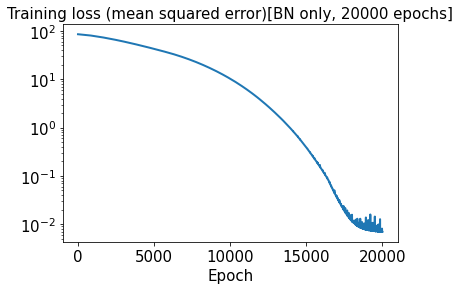

In [16]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.yscale("log")
plt.title('Training loss (mean squared error)[BN only, 20000 epochs]', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

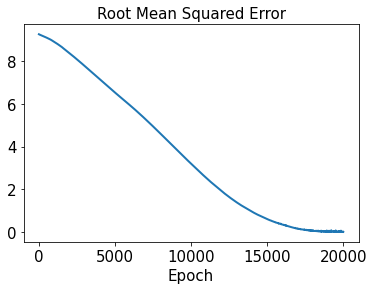

In [17]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
decoded_sensor_train = sensor_pred1.predict(t_train)

In [19]:
decoded_sensor_test = sensor_pred1.predict(t_test)

In [20]:
error_train_abs = np.abs(decoded_sensor_train - x_train)

In [21]:
error_test_abs = np.abs(decoded_sensor_test - x_test)

In [22]:
error_train_abs

array([[[0.30984725],
        [0.24662898],
        [0.19779339],
        [0.21370621],
        [0.29643631],
        [0.99604292],
        [0.7710866 ],
        [0.98408518],
        [1.15170364],
        [1.36107826],
        [0.77211304],
        [1.67735901],
        [1.46309052],
        [1.68046455],
        [2.34364319],
        [1.39209194]],

       [[0.30864333],
        [0.25231806],
        [0.21288075],
        [0.23233379],
        [0.28501105],
        [0.98847098],
        [0.75261583],
        [0.95937333],
        [1.14177589],
        [1.33439541],
        [0.73155851],
        [1.64337912],
        [1.43565903],
        [1.59374361],
        [2.35141659],
        [1.36296387]],

       [[0.30957536],
        [0.24776223],
        [0.20080719],
        [0.21744137],
        [0.29410028],
        [0.99440413],
        [0.7672864 ],
        [0.97900667],
        [1.14956112],
        [1.35555744],
        [0.7638567 ],
        [1.6703373 ],
        [1.45738831],
      

In [23]:
l2_error_sensor_train = np.sqrt(np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2))
print(l2_error_sensor_train)

0.1326092865340614


In [24]:
l2_error_sensor_test = np.sqrt(np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2))
print(l2_error_sensor_test)

0.12362892641850627
